# bc-MC consumption-savings problem


## The model

We consider the following consumption-saving problem: 

\begin{equation*}
\begin{split}
\max_{\{c_t\}_{t=0}^{\infty}} E\Big[ \sum_{t=0}^{\infty} \beta^t u(c_t) \exp(\delta_t)\Big]
\end{split}
\end{equation*}
subject to the same constraints:
$$
\begin{gather*}
\text{s.t. }w_{t+1}=\left( w_{t}-c_{t}\right) \overline{r}\exp (r_{t+1})+\exp
(y_{t+1}), \\
c_{t} \leq w_{t} + b
\end{gather*}
$$

Total income $y_t$ is assumed to be stochastic, with $y_t = \exp(\sum_{i=1}^{l} p_{i,t})$. The model has $2+l$ exogenous variables, which we assume to follow AR(1) processes:

\begin{equation}
\begin{split}
p_{i,t+1} & = \rho_{i,p} p_{i,t} + \sigma_{i,p} \varepsilon^{p}_{i,t+1}, \quad \forall i \in {1,2,...,l}\\
r_{t+1} & = \rho_r r_t + \sigma_r \varepsilon^{r}_{t+1} \\
\delta_{t+1} & = \rho_{\delta} \delta_t + \sigma_{\delta} \varepsilon^{\delta}_{t+1}
\end{split}
\end{equation}


* The state is a $3+l$-dimensional vector $s = \big(w, r, \delta, p_{1}, ..., p_{l}\big)$.

* The shock is a $2+l$-dimensional vector $\varepsilon= \big(\varepsilon^{r}, \varepsilon^{\delta}, \varepsilon^{p}_{1}, ..., \varepsilon^{p}_{l} \big)$

The variable $c_{t}$ represents consumption; $w_{t}$ is the beginning-of-period
cash-on-hand; $\beta \in \left[ 0,1\right)$ is a subjective discount
factor;  $\overline{r}\in \left( 0,\frac{1}{\beta }\right)$ is a (gross)
constant interest rate; and given some initial conditions.
There is an occasionally binding inequality constraint: consumption $c_{t}$ can exceed cash-on-hand $w_{t}$, because of borrowing ($b$). 


where $\varepsilon^i_t \sim \mathcal{N}\left( 0,1\right)$. We assume the Cobb-Douglas utility function $u\left( {c_{t}}\right) =\frac{1}{1-\gamma }\left( c_{t}^{1-\gamma }-1\right)$.

## Euler equation of the model

Expectation is with respect to the innovation vector $\varepsilon$


$$
\begin{gather*}
\max\Big( \beta \overline{r}E_{\varepsilon }\left[ \frac{u^{\prime }\left(
c^{\prime }\right) }{u^{\prime }(c)}\exp \left(   \delta ^{\prime }-\delta
+r^{\prime }\right)  \right], \frac{u'(w + b)}{u'(c)} \Big) - 1 = 0
\end{gather*}
$$

Unit-less measure of accuracy:

$$
\begin{gather*}
1 - \frac{1}{c} (u^{\prime})^{-1} \Big[\max \Big( \beta \overline{r}E_{\varepsilon }\left[ u^{\prime }\left(
c^{\prime }\right) \exp \left( \delta ^{\prime }-\delta
+r^{\prime }\right), u^{\prime}(w + b) \Big) \right] = 0
\end{gather*}
$$

## ANN formulation

The solution to this dynamic programming problem is characterized by the following Kuhn-Tucker conditions:

\begin{equation}\label{eq:KT_BC}
\begin{split}
A \geq 0, H \geq 0, AH = 0 \\
A \equiv w - c\\
H \equiv u'(c) - \beta \bar{r} E_{\varepsilon} \Big[u'(c')\exp(\delta' - \delta + r')\Big]
\end{split}
\end{equation}

The loss function for the ANN is:

\begin{equation}
\begin{split}
    \mathcal{L}(\theta) & =  \mu_1 E_{s}\Big[  \Big(  E_{\varepsilon}\Big[\beta \bar{r} \frac{u'(c(s'|\theta))}{u(c(s|\theta))}\exp(\delta' - \delta + r') - h(s|\theta) \Big] \Big)^2 \Big] \\
    & + \mu_2 \Big( E_{s} \Big[ \Psi\Big(1 - \frac{c(s|\theta)}{w}, 1 - h(s|\theta)\Big)^2 \Big] \Big)
    \end{split}
\end{equation}


We use the Fischer-Burmeister (FB) function, defined by $\Psi(a, h) \equiv a + h - \sqrt{a^2 + h^2}$. The FB function is such that when it is equal to 0, the Kuhn-Tucker conditions are satisfied: $\Psi (a, h) = 0 \Leftrightarrow a \geq 0, h \geq 0, ah = 0 $ (see for instance Chen et al, 2000). 

Using the bc-MC estimator:

\begin{equation}\label{eq:loss_function_bc_1}
\begin{split}
    \mathcal{L}^U_{M,N}(\theta) & =  \mu_1 \frac{2}{MN(N-1)} \sum_{m=1}^{M} \sum_{1 \leq i < j}^{N}  f(s_m,\epsilon^i_m|\theta) f(s_m,\epsilon^j_m|\theta) \\
    & + \mu_2 \frac{1}{M} \sum_{m=1}^{M}   \Psi\Big(1 - \frac{c(s_m|\theta)}{w_m}, 1 - h(s_m|\theta)\Big)^2
\end{split}
\end{equation}

with $f(s,\epsilon|\theta) \equiv \beta \bar{r} \frac{u'(c(s'|\theta))}{u(c(s|\theta))}\exp(\delta' - \delta + r') - h(s|\theta) $


# 0. Dependencies 

You can use 'pip' to install dependencies.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import random
import scipy.stats
import chaospy  ## for quadrature
from itertools import product
import os

import tensorflow as tf
import time
import os
import pandas as pd
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from tqdm import tqdm as tqdm         # tqdm is a nice library to visualize ongoing loops
import datetime
# followint lines are used for indicative typing
from typing import Tuple
class Vector: pass
from scipy.stats import norm
import Tasmanian
import torch
from torch import nn
from torch.utils.data import DataLoader
# To create copies of NN
import copy
import matplotlib.ticker as mtick
# To use sparse kronecker product
from scipy import sparse
from torchcontrib.optim import SWA
import itertools
# Interpolations
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator

# Regressions
import statsmodels.formula.api as smf
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

import quantecon as qe
from interpolation import interp
from quantecon.optimize import brentq
from numba import njit, float64
from numba.experimental import jitclass
#import copy # Not used so far

import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

2024-01-18 14:10:02.758837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-18 14:10:02.758860: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Display version of python currently used
!python3 --version

Python 3.8.10


In [3]:
# Display which version of packages I am using
!pip freeze > requirements.txt
!cat requirements.txt

absl-py==1.0.0
aiodns==3.0.0
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.8
altair==5.0.0
appdirs==1.4.4
apturl==0.5.2
argon2-cffi==21.1.0
arviz==0.15.1
astunparse==1.6.3
async-generator==1.10
async-timeout==4.0.1
attrs==21.2.0
autograd==1.6.2
Babel==2.6.0
backcall==0.2.0
backports.zoneinfo==0.2.1
bcrypt==3.1.7
beautifulsoup4==4.12.2
bleach==4.1.0
blinker==1.4
bokeh==2.4.2
bottle==0.12.19
branca==0.4.2
Brlapi==0.7.0
Brotli==1.0.9
bs4==0.0.1
cached-property==1.5.1
cachetools==4.2.4
cattrs==1.9.0
cchardet==2.1.7
ccsm==0.9.14.1
certifi==2019.11.28
cffi==1.15.0
chaospy==4.3.8
chardet==3.0.4
charset-normalizer==2.0.7
chrome-gnome-shell==0.0.0
Click==7.0
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==3.0.0
cmake==3.21.4
cmasher==1.6.3
colorama==0.4.3
colorspacious==1.1.2
command-not-found==0.3
compizconfig-python==0.9.14.1
conan==1.42.1
contourpy==1.0.7
corner==2.2.1
cryptography==2.8
cupshelpers==1.0
cycler==0.11.0
DateTime==4.3
dblatex===0.3.11py3
DBnomics==1.2.3
dbus-python==1.2.16
debu

In [4]:
# Import functions from a notebook
%run functions-bc-MC-consumption-savings.ipynb
# Set default figsize
plot_scale = 1.25
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)
# Controlling fontsizes
SMALL_SIZE = 12
MEDIUM_SIZE = SMALL_SIZE + 2
BIGGER_SIZE =  SMALL_SIZE + 4
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
dpi_chosen=600 #control the quality of .png
linewidth_chosen = 2

Using cpu device


In [5]:
seed_number = 1234
random.seed(seed_number) # For replicability reasons
print(random.random()) 

0.9664535356921388


In [6]:
current_wd = os.getcwd() 
output_folder = current_wd  + "/output/"
# Create folder if does not exist:
if not os.path.exists(output_folder):
    # If it doesn't exist, create it
    os.makedirs(output_folder)

In [7]:
distrib = chaospy.J(chaospy.Normal(0, 1))
nodes, weights = dist(1, distrib, rule = "gaussian", sp=True)
nodes.shape

(1, 2)

In [8]:
# Store parameters
class MyParams():
    """
    N: number of draws for innovation vector
    M: number of draws for the state vector
    lr: learning rate
    pre_train_model: whether or not pre-train the model before starting the full training loop (not used)
    nb_epochs: number of gradient descent steps during training
    bc: borrowing constraint 
    order_gauss: order for the Gaussian quadrature to use when solving with time iteration
    σ_shocks: parameter determining the variance of shocks
    use_Sobol: whether or not use Sobol sampling for the state stapce
    dim_p: number of different pi
    grid_depth: depth of the sparse grid
    nb_refinements: nb refinement for the adaptive sparse grid
    surplus_threshold: surplus threshold to use for the adaptive sparse grid
    name_params: name of params object initialized
    nb_points_w: nb grid points for w grid
    nb_points_other: nb grid points other dimensions
    w1: weight first element loss function
    w2: weight second element loss function
    debug: if True, print info on params when building it
    """
    def __init__(self, N, M, lr, pre_train_model, nb_epochs, 
                 bc, order_gauss, σ_shocks, use_Sobol, 
                 optimizer, dim_p,
                 grid_depth, nb_refinements, surplus_threshold,
                 name_params,
                 nb_points_w=10, nb_points_other=3, 
                 w1 = 0.5, w2 = 0.5,
                 debug=False):
        # savings-consumption with binding constraint
        # Model parameters
        self.β = 0.9 #0.9 default is 0.9 
        self.γ = 2.0
        self.one_min_γ = 1 - self.γ
        self.σ_shocks = σ_shocks #default 0.01
        self.σ_r = self.σ_shocks #0.01
        self.ρ_r = 0.9 #0.2
        self.σ_δ = self.σ_shocks
        self.ρ_δ = 0.9 #0.2
        self.σ_p = self.σ_shocks
        self.ρ_p = 0.9 
        self.rbar = 1.04
        # Level of borrowing constraint
        if isinstance(bc, (int, float)):
            self.bc = bc
            self.bc_torch = torch.tensor([self.bc])
        else:
            raise TypeError("bc_chosen must be a real number (int or float).")       
        # Standard deviations for ergodic distributions of exogenous state variables
        self.σ_e_r = self.σ_r/(1-self.ρ_r**2)**0.5
        self.σ_e_δ = self.σ_δ/(1-self.ρ_δ**2)**0.5
        self.σ_e_p = self.σ_p/(1-self.ρ_p**2)**0.5
        # grids
        self.dim_p = dim_p #(p1, p2, ..., pl)
        self.dim_state = 3 + dim_p #(w ,r, delta, p1, p2, ..., pl)
        self.dim_shock = 2 + dim_p #(e_r, e_delta, e_p1, e_p2, ..., e_pl)
        self.n_points_grid = nb_points_other #nb points for (r, δ, p1, ..., pl)
        self.n_points_w = nb_points_w #10 #nb points for w
        self.r_min = -2*self.σ_e_r 
        self.r_max = 2*self.σ_e_r 
        self.δ_min = -2*self.σ_e_δ
        self.δ_max = 2*self.σ_e_δ
        self.p_min = -2*self.σ_e_p
        self.p_max = 2*self.σ_e_p 
        # bounds for endogenous state variable (cash-in-hand)
        self.wmin = 0.001 #0.05 #0.5 #0.1 #4 stdev with bc =0, based on TI. 0.7752188662883139 - 1.3681603157252489
        self.wmax = 3.0 #2.0 #4.0
        self.w_grid = np.linspace(self.wmin, self.wmax, self.n_points_w)
        self.r_grid = np.linspace(self.r_min, self.r_max, self.n_points_grid)
        self.δ_grid = np.linspace(self.δ_min, self.δ_max, self.n_points_grid)
        self.p_grid = np.linspace(self.p_min, self.p_max, self.n_points_grid)
        # generate a tensor product grid
        # order: w, r, delta, p1, p2, ..., pn
        strr = "self.w_grid, self.r_grid, self.δ_grid"
        # add p1, ..., pl
        for i in range(0, dim_p): 
            strr = strr + ',' + "self.p_grid"
        if debug==True:
            print("Tensor product grid build with: {}".format(strr)) #debug
        self.wrδ_ps_grid = eval('list(itertools.product({}))'.format(strr))
        # Generate a grid for indices along each dimension
        self.indices_w = range(self.n_points_w)
        self.indices_r = range(self.n_points_grid)
        self.indices_δ = range(self.n_points_grid)
        self.indices_p = range(self.n_points_grid)
        # order: w, r, delta, p1, p2, ..., pn
        strr = "self.indices_w, self.indices_r, self.indices_δ"
        # add p1, ..., pl
        for i in range(0, dim_p): 
            strr = strr + ',' + "self.indices_p"
        self.wrδ_ps_indices = eval('list(itertools.product({}))'.format(strr))
        # Functions
        self.u = lambda c: (1/self.one_min_γ)*(c**(self.one_min_γ) - 1)
        self.u_prime =  lambda c: c**(-self.γ)
        self.u_prime_inv =  lambda c: c**(-(1/self.γ))
        # Standard shocks
        σ_e = 0.5 #
        μ_e = 0.0 #location parameter shocks
        # Values passed as inputs
        self.N = N #number of draws inside expectation
        self.M = M #number of draws outside expecation
        self.MN = int(M*N)
        # To keep constant the number of function evaluations
        self.T = int((M*N)/2) #number of draws all in on expectation
        # To compare Loss functions
        #self.T = int((M*N)) #number of draws all in on expectation
        self.x_distribution = "Uniform" #"Normal" #Uniform or Normal
        self.σ_e = σ_e
        self.μ_e = μ_e
        self.e_distribution = "Lognormal" #"Normal"
        self.x_low = self.wmin
        self.x_high = self.wmax
        # Vectorized Monte Carlo requires the creation of some objects
        # To repeat vectors
        repeat_vector = torch.ones(N) #to repeat the same value n times using a matrix multiplication
        # To calculate the expectation wrt future shocks using a matrix multiplication
        A = sparse.eye(M) 
        B = sparse.csr_matrix(np.ones(N)/N)
        # Sparse kronecker product. Then convert to pytorch sparse
        # W used using the sum((sum)^2) formula
        W = sparse_mx_to_torch_sparse_tensor(sparse.kron(A, B))
        self.repeat_vector = repeat_vector
        self.W = W  
        # W used using the 2/N(N-1) sum() formula
        self.W_expanded = create_W_expanded_matrix(self.M, self.N)
        # Learning parameters
        self.lr = lr
        self.momentum = 0.9 #momentum for SGD with momentum
        self.lr_pre_train = 1e-3 #learning rate during pre-training
        self.optimizer = optimizer #"Adam" #default: #Adam or SGD or SWA
        self.freq_gamma = 0.95 #0.85
        self.use_scheduler = False #default: True
        self.pre_train_model = pre_train_model #default: True
        self.nb_epochs = nb_epochs
        self.nb_epochs_pre_train = int(self.nb_epochs/1)
        self.freq_scheduler = 1000 #int(self.nb_epochs/10)
        # Sobol sampling
        self.soboleng = torch.quasirandom.SobolEngine(dimension=1) #sobol draws for income
        self.use_Sobol = use_Sobol #Sobol for dimension M
        self.use_Sobol_T = use_Sobol #Sobol for all-in-one
        # DEBUG PARAMS
        self.error_correction=True #error correction for the model
        self.selective_error_correction=False #error correction for the model, only if give positive values
        self.abs_value=False
        self.perfect_forecast = False
        self.fake_bias=0.0
        # GAUSSIAN QUADRATURE
        # value e_r, e_δ, e_p1, e_p2, ..., e_pl
        strr = "chaospy.Normal(0, self.σ_r), chaospy.Normal(0, self.σ_δ)"
        # add p1, ..., pl
        for i in range(0, dim_p): 
            strr = strr + ',' + "chaospy.Normal(0, self.σ_p)"
        if debug==True:
            print("Quadrature grid build for: {}".format(strr)) #debug
        self.distrib = eval('chaospy.J({})'.format(strr))
        #self.distrib = chaospy.J(chaospy.Normal(0, self.σ_r), chaospy.Normal(0, self.σ_δ), chaospy.Normal(0, self.σ_p))
        self.order_gauss = order_gauss
        nodes, weights = dist(self.order_gauss, self.distrib, rule = "gaussian", sp=True)
        self.nodes = nodes
        self.weights = weights
        self.weights_torch = torch.tensor(weights)
        self.nodes_torch = torch.tensor(np.transpose(self.nodes)) #column=dim. Row=observation
        # Save the number of points for the guassian quadrature:
        self.N_gaussian = len(self.weights_torch)
        # Implied number of points for the current space (T=MN/2 <-> M = 2T/N)
        self.M_gaussian = int((2*self.T)/self.N_gaussian)
        self.MN_gaussian = self.N_gaussian*self.M_gaussian
        # Repeat nodes to match the number of function evaluations for the expectation
        self.nodes_torch_repeated = self.nodes_torch.repeat(self.M_gaussian, 1)
        # CREATE A W MATRIX FOR GAUSSIAN QUADRATURE:
        B_gaussian = sparse.csr_matrix(self.weights_torch)
        # Sparse kronecker product. Then convert to pytorch sparse
        A_gaussian = sparse.eye(self.M_gaussian) 
        self.W_gaussian = sparse_mx_to_torch_sparse_tensor(sparse.kron(A_gaussian, B_gaussian))
        # SCALE OF THE OBJECTIVE FUNCTION
        self.nb_points_test = 1000
        self.xvec_test_torch = torch.linspace(self.x_low, self.x_high, self.nb_points_test).unsqueeze(1) #add a dimension
        self.xvec_test = self.xvec_test_torch.numpy()
        self.swa_start = 1000
        self.swa_freq= 10
        # To measure accuracy during training
        self.M_accuracy = 5000
        self.N_accuracy = 100
        self.MN_accuracy = int(self.M_accuracy*self.N_accuracy)
        self.repeat_vector_accuracy = torch.ones(self.N_accuracy)
        # Sparse version        
        A = sparse.eye(self.M_accuracy)
        B = sparse.csr_matrix(np.ones(self.N_accuracy)/self.N_accuracy)
        # Sparse kronecker product. Then convert to pytorch sparse
        self.W_accuracy = sparse_mx_to_torch_sparse_tensor(sparse.kron(A, B))
        # randomly drawing current states
        self.r_accuracy = torch.normal(mean=0, std=self.σ_e_r, size=(self.M_accuracy,)) 
        self.δ_accuracy = torch.normal(mean=0, std=self.σ_e_δ, size=(self.M_accuracy,)) 
        # dimension (M, dim_p)
        self.p_accuracy = torch.normal(mean=0, std=self.σ_e_p, size=(self.M_accuracy, dim_p)) 
        #w = (params.wmin - params.wmax) * torch.rand(n) + params.wmax #uniform
        w = (self.wmin - self.wmax) * self.soboleng.draw(self.M_accuracy) + self.wmax #uniform
        self.w_accuracy = w.squeeze(1)
        # n_Monte_Carlo for each value today
        self.e_r_accuracy = torch.normal(mean=0, std=self.σ_r, size=(self.MN_accuracy,)) 
        self.e_δ_accuracy = torch.normal(mean=0, std=self.σ_δ, size=(self.MN_accuracy,)) 
        self.e_p_accuracy = torch.normal(mean=0, std=self.σ_p, size=(self.MN_accuracy, dim_p)) 
        #
        self.r_repeated_accuracy = torch.kron(self.r_accuracy, self.repeat_vector_accuracy)
        self.δ_repeated_accuracy = torch.kron(self.δ_accuracy, self.repeat_vector_accuracy)
        self.w_repeated_accuracy = torch.kron(self.w_accuracy, self.repeat_vector_accuracy)
        # dimension (MN, dim_p))
        self.p_repeated_accuracy = self.p_accuracy.repeat_interleave(self.N_accuracy, dim=0) #repeat N times
        # transitions of the exogenous processes
        #r = torch.normal(mean=0, std=σ_e_r, size=(n,)) 
        #torch.kron(r, repeat_vector).shape
        self.rnext_accuracy = self.r_repeated_accuracy*self.ρ_r + self.e_r_accuracy
        self.δnext_accuracy = self.δ_repeated_accuracy*self.ρ_δ + self.e_δ_accuracy
        self.pnext_accuracy = self.p_repeated_accuracy*self.ρ_p + self.e_p_accuracy
        # For the next period, the sum of p1, p2, ... , pl matter
        self.pnext_sum_accuracy = torch.sum(self.pnext_accuracy, axis=1) #sum over rows
        # To store the solution of time iteration
        # Order of the loop: w, r, delta, p1, p2, ..., pn
        strr = "self.n_points_w, self.n_points_grid, self.n_points_grid"
        # add p1, ..., pl
        for i in range(0, dim_p): 
            strr = strr + ',' + "self.n_points_grid"
        if debug==True:
            print("Grid to store TI values: {}".format(strr)) #debug
        self.c_grid_TI = eval('np.zeros(({}))'.format(strr))
        # Order of the loop: w, r, delta, p1, p2, ..., pn
        strr = f"{name_params}.n_points_w, {name_params}.n_points_grid, {name_params}.n_points_grid"
        # add p1, ..., pl
        for i in range(0, dim_p): 
            strr = strr + ',' + f"{name_params}.n_points_grid"
        self.str_nb_points = strr
        # Order of the loop: w, r, delta, p1, p2, ..., pn
        strr = f"{name_params}.w_grid, {name_params}.r_grid, {name_params}.δ_grid"
        # add p1, ..., pl
        for i in range(0, dim_p): 
            strr = strr + ',' + f"{name_params}.p_grid"
        strr = strr + "," + "σ, x"
        self.str_c_grid_TI = strr
        if debug==True:
            print("Grid for c_grid_TI: {}".format(self.str_c_grid_TI)) #debug
        exec('self.c_function_TI = lambda x: interp({})'.format(strr))
        # For evaluations with a function
        strr = f"{name_params}.w_grid, {name_params}.r_grid, {name_params}.δ_grid"
        # add p1, ..., pl
        for i in range(0, dim_p): 
            strr = strr + ',' + f"{name_params}.p_grid"
        strr = strr + "," + "σ_local, x"
        self.str_c_grid_TI_local = strr
        def identity_function(x):
            return x
        self.c_function_TI = identity_function #Initialization TI solution, interpolated
        self.ss = np.ones(self.dim_state) #steady-state value
        # Parameters for the adaptive sparse grid
        self.grid_depth = grid_depth # Initial depth of the sparse grid
        self.nb_refinements = nb_refinements # Nb of refinement steps for the sparse grid
        self.surplus_threshold = surplus_threshold #
        self.grid_dim = 3 + self.dim_p # Dimension input: (w, r, delta, vector ps)
        self.grid_out = 1 # Dimension output
        self.grid_order = 1 #1 # 1=linear, 2=quadratic, 3=cubic
        self.grid_rule = "localp" # Type of base functions
        # Need to set the domain
        ## 2 columns: min, max
        ## rows: corresponding to a variable
        ## Order: w, r, delta, p1, p2, ..., pn
        self.domain_transform = np.zeros((self.grid_dim, 2))
        self.domain_transform[0,:] = np.array([self.wmin, self.wmax])
        self.domain_transform[1,:] = np.array([self.r_min, self.r_max])
        self.domain_transform[2,:] = np.array([self.δ_min, self.δ_max])
        # max and min for the ps:
        self.domain_transform[3:,:] = np.array([self.p_min, self.p_max])
        # Store grid that is updating during time iteration
        self.grid_old = Tasmanian.makeLocalPolynomialGrid(self.grid_dim, self.grid_out, self.grid_depth, self.grid_order, self.grid_rule)
        self.grid_old.setDomainTransform(self.domain_transform)
        self.grid_old_points = self.grid_old.getPoints() # Points of the grid
        # Let's store another grid to test for convergence of the time iteration algo
        self.grid_depth_test = 2
        self.grid_test = Tasmanian.makeLocalPolynomialGrid(self.grid_dim, self.grid_out, self.grid_depth_test, self.grid_order, self.grid_rule)
        self.grid_test.setDomainTransform(self.domain_transform)
        self.grid_test_points = self.grid_old.getPoints()
        # To store sparse solution
        self.c_grid_TI_sparse = np.zeros((self.grid_old_points.shape[0],1))
        self.c_function_TI_sparse = identity_function # Initialization TI solution, using sparse grid
        # weights in the loss function
        self.w1 = w1
        self.w2 = w2
        # Check bad combination
        if (self.optimizer == "SWA") & (self.use_scheduler == True):
            raise('opt SWA and use_schedule = True')

In [9]:
M_chosen = 100 #25 #100 #200 # 50 #outer expectation 
N_chosen = 2 #8 #2 #4 # Inner expectation
lr_chosen = 1e-3 #0.5e-2
pre_train_model_chosen = False
nb_epochs_chosen = 10000
order_gauss = 1 #2 #Default. order_gauss = 2
bc_chosen = 1.0 #1.0 #1.0 #0.0 #1.0 #0.0 #1.0
σ_shocks_chosen = 0.01
use_Sobol_chosen = False
optimizer_chosen = "Adam"
dim_p_chosen =  2 #Default is 2 (p and q, as in section 4.2)
# Parameters for the sparse grid
grid_depth_chosen = 2
nb_refinements_chosen = 2
surplus_threshold_chosen = 1e-4
name_params = "params_TI"
w1_chosen = 0.5
w2_chosen = 0.5

# REMARK:
# for the dense grid, to change the number of points on w-grid, change self.n_points_w = 10 
# to change the number of points for the other dimensions, change self.n_points_grid = 3
params_TI = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen, 
                  dim_p_chosen, grid_depth_chosen, nb_refinements_chosen, surplus_threshold_chosen, 
                  name_params, nb_points_w=10, nb_points_other=3,
                  w1 = w1_chosen, w2 = w2_chosen)

show_params(params_TI)

learning rate: 0.001
nb epochs: 10000
W.shape: torch.Size([100, 200])
W_expanded.shape: torch.Size([200, 200])
M: 100
N: 2
MN: 200
T: 100
T: False
Budget constraint: 1.0
σ_shocks: 0.01
use_Sobol: False
optimizer_chosen: Adam
use_scheduler: False
grid_depth_chosen: 2
grid_depth_chosen: 2
surplus_threshold_chosen: 0.0001
w1: 0.5
w2: 0.5


/tmp/ipykernel_1268502/2656475211.py:8: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  return torch.sparse.FloatTensor(indices, values, shape)


---
---

# I. Time iteration solution

## I.A Time iteration solution on dense grid

Iterate over the Euler equation of the model:

$$
\begin{gather*}
u^{\prime }(c) = \beta \overline{r}E_{\epsilon }\left[ u^{\prime }\left(
c^{\prime }\right) \exp \left(   \delta ^{\prime }-\delta
+r^{\prime }\right)  \right] 
\end{gather*}
$$

$$ c(w_t, y_t, p_t, r_t, \delta_t) $$

In [10]:
# Initial guess for time iteration
# initialize empty array
exec("σ = np.zeros(({}))".format(params_TI.str_nb_points))
print("Shape array: {}".format(σ.shape))

# Loop over values and indices
# Order:  w, r, delta, p1, p2, ..., pn
for (counter, (indices, vals)) in enumerate(zip(params_TI.wrδ_ps_indices, params_TI.wrδ_ps_grid)):
    w_value = vals[0]
    σ[indices] = 0.9*w_value
    
# Interpolate
σ_func =  eval('lambda x: interp({})'.format(params_TI.str_c_grid_TI))
σ_func(np.array(vals) + 1) 

Shape array: (10, 3, 3, 3, 3)


2.7

In [11]:
%%time
tol=0.0001
max_iter=100
verbose=True
print_skip = 1
i = 0
error = tol + 1

while i < max_iter:
    σ_new = K_quadrature(σ, σ_func, params_TI)
    error = np.max(np.abs(σ - σ_new))
    i += 1
    if verbose and i % print_skip == 0:
        print(f"Error at iteration {i} is {error}.")
    σ = σ_new
    
    #Create function by interpolation
    σ_func_TI = eval('lambda x: interp({})'.format(params_TI.str_c_grid_TI))
        
    if (error < tol) or (i == max_iter):
        if (error < tol):
            print("Convergence reached after {} iterations".format(i))
        if (i == max_iter):
            print("Convergence NOT reached after {} iterations".format(i))
        params_TI.c_grid_TI = copy.deepcopy(σ)
        params_TI.c_function_TI = copy.deepcopy(σ_func_TI)
        break

Error at iteration 1 is 0.7936228125157232.
Error at iteration 2 is 0.27530938208335654.
Error at iteration 3 is 0.13563435757129105.
Error at iteration 4 is 0.07774004708544813.
Error at iteration 5 is 0.05946338918675953.
Error at iteration 6 is 0.05197757962574079.
Error at iteration 7 is 0.04986257787946924.
Error at iteration 8 is 0.04105516990747171.
Error at iteration 9 is 0.03683140417220243.
Error at iteration 10 is 0.03091837711925083.
Error at iteration 11 is 0.028340942946082026.
Error at iteration 12 is 0.02362918676648651.
Error at iteration 13 is 0.019183897994966337.
Error at iteration 14 is 0.015670993531216704.
Error at iteration 15 is 0.013504629864905526.
Error at iteration 16 is 0.01167666649632837.
Error at iteration 17 is 0.009404284577834598.
Error at iteration 18 is 0.007472719650299053.
Error at iteration 19 is 0.006243455030278344.
Error at iteration 20 is 0.0052428647457301025.
Error at iteration 21 is 0.004450084803281573.
Error at iteration 22 is 0.0038126

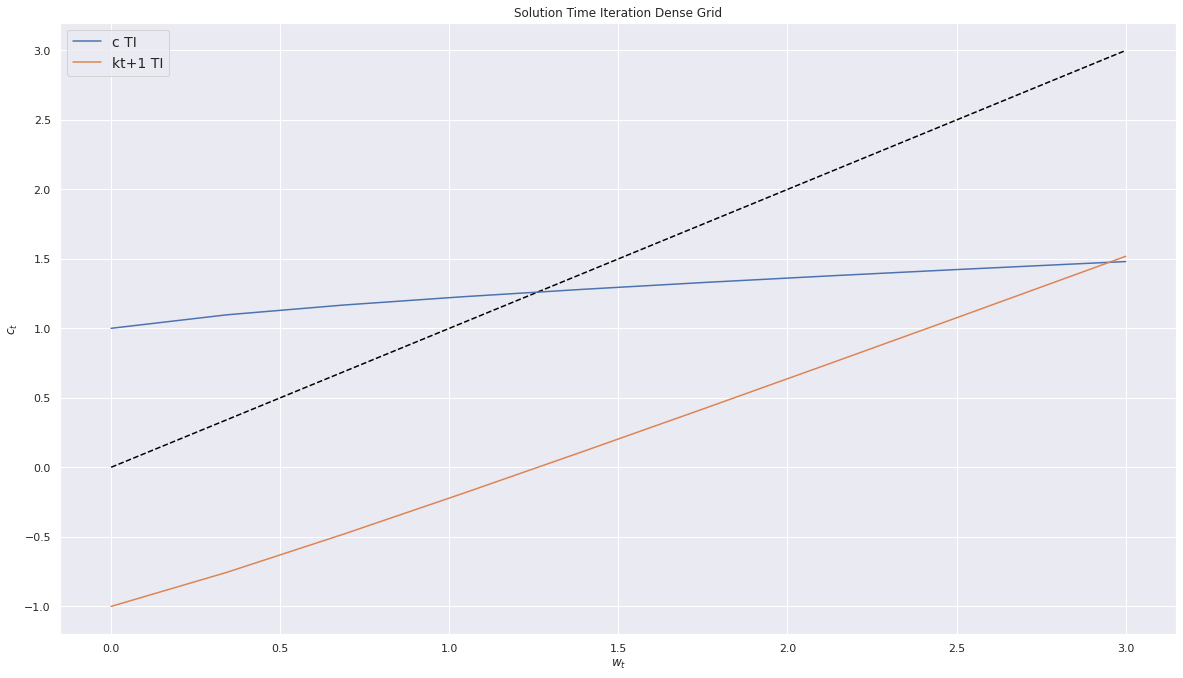

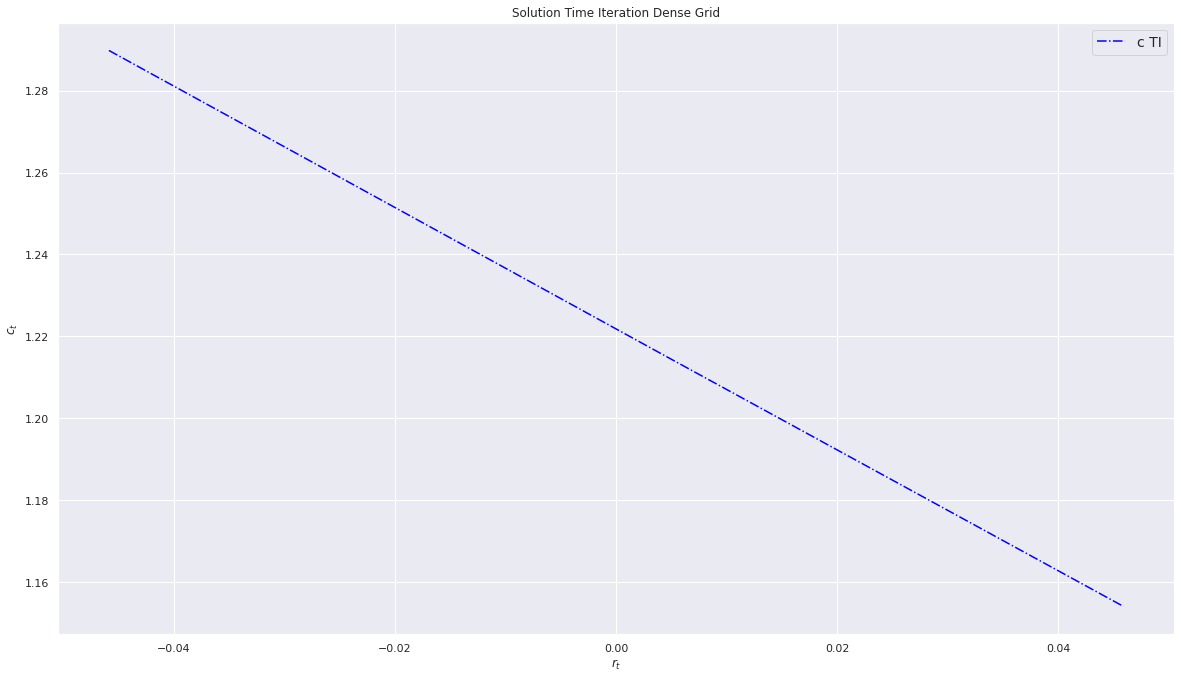

In [12]:
# Plot the result
len_wec = params_TI.nb_points_test

with torch.no_grad():
    rvec = 0.0*np.ones(len_wec) #np.zeros(len_wec)
    δvec = 0.0*np.ones(len_wec) #np.zeros(len_wec)
    wvec = params_TI.xvec_test

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen))))
    
    cvec_TI = params_TI.c_function_TI(state_next) #σ_func(state_next)
    # Save for latter use
    cvec_TI_bc_0 = cvec_TI.copy()
    k_next_TI = wvec.squeeze(1) - cvec_TI
    k_next_TI_bc_0 = k_next_TI.copy()
    wgrid_TI_dense_bc_0  = params_TI.w_grid.copy()

plt.plot(wvec, wvec, linestyle='--', color='black')
plt.plot(wvec, cvec_TI, label='c TI')
plt.plot(wvec, k_next_TI, label='kt+1 TI')
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration Dense Grid")
plt.legend()
plt.show()

# Plot the result
len_wec = params_TI.nb_points_test

with torch.no_grad():
    rvec = np.linspace(params_TI.r_min, params_TI.r_max, len_wec)
    δvec = np.zeros(len_wec)
    wvec = np.ones(len_wec)

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
    cvec_TI = params_TI.c_function_TI(state_next) #σ_func(state_next)
    k_next_TI = wvec - cvec_TI

#plt.plot(rvec, rvec, linestyle='--', color='black')
plt.plot(rvec, cvec_TI, label='c TI', color="blue", linestyle="dashdot")
#plt.plot(rvec, k_next_TI, label='kt+1 TI', color="green", linestyle="dashdot")
plt.xlabel("$r_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration Dense Grid")
plt.legend()

### Accuracy Time Iteration solution

Uses Monte Carlo Integration to approximate the expectation with respect to next period's shocks.

Euler TI Dense Grid
Mean: 0.005579430186998703
Median: 0.0028868468624032584
Min: 6.533060679103642e-07
Max: 0.07662144233889978
std dev.: 0.008993020357794285

Euler Bis TI Dense Grid
Mean: 0.002825222283935534
Median: 0.0014436332531529983
Min: 3.2665287397204423e-07
Max: 0.04066298448319894
std dev.: 0.004646343973314666


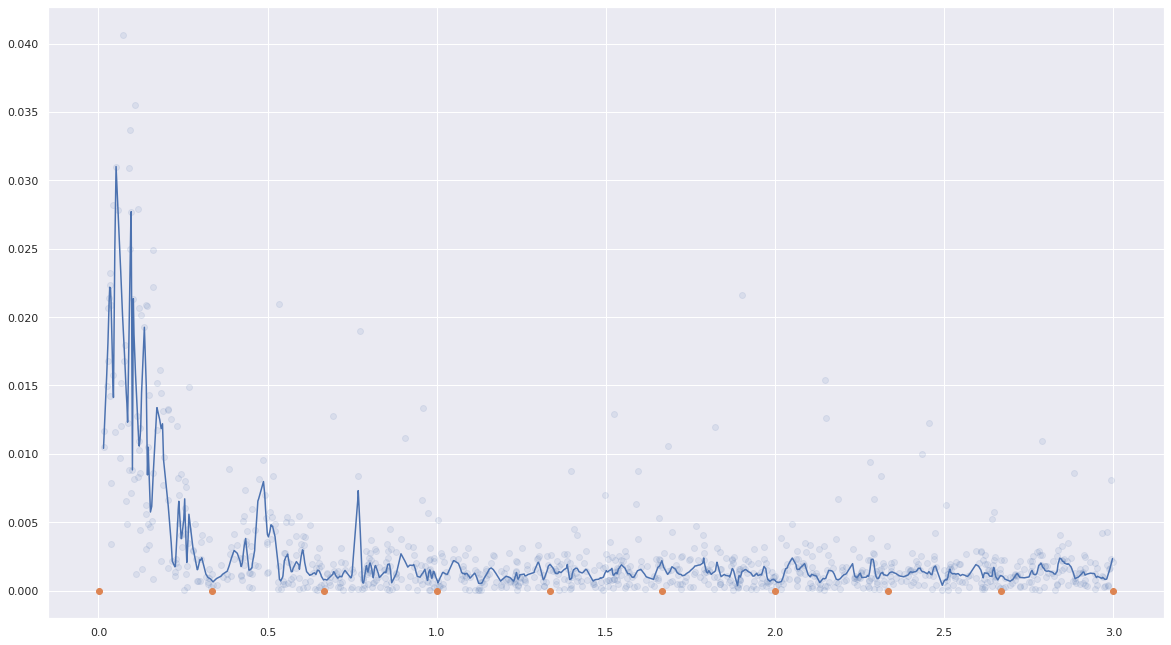

In [13]:
# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_TI_MC(1000, 1000, params_TI)

print("Euler TI Dense Grid")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("\nEuler Bis TI Dense Grid")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))

# Smoothed conditional mean
smoothed = lowess(euler_bis, w, frac=1./100)
plt.scatter(w, euler_bis, alpha=0.1)
plt.scatter(params_TI.w_grid, np.zeros(params_TI.n_points_w), label="grid points")
plt.plot(smoothed[:,0], smoothed[:,1])

Euler TI Dense Grid
Mean: 0.0055610657807924095
Median: 0.0029696869346572674
Min: 5.977128130219e-07
Max: 0.07445738812849989
std dev.: 0.00917938525620513

Euler Bis TI Dense Grid
Mean: 0.002814650100283996
Median: 0.0014815444898924057
Min: 2.988565404038468e-07
Max: 0.039445661243914465
std dev.: 0.004739640328402118


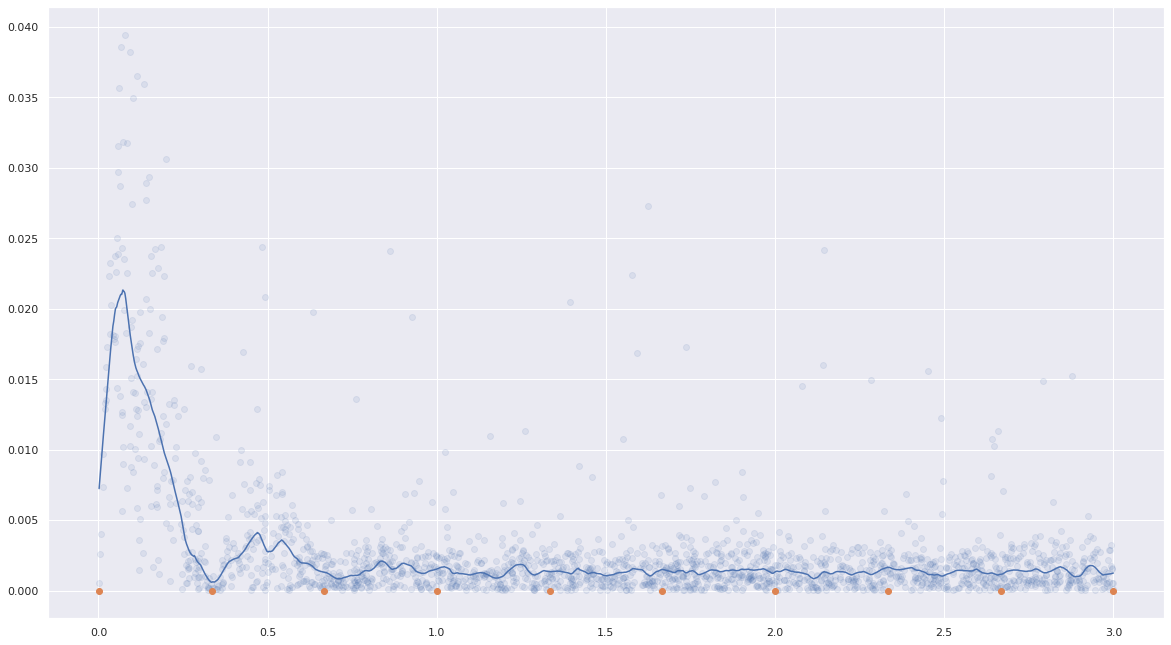

In [14]:
# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_TI_Gaussian(2000, params_TI)

print("Euler TI Dense Grid")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("\nEuler Bis TI Dense Grid")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))

# Smoothed conditional mean
smoothed = lowess(euler_bis, w, frac=1./50)
plt.scatter(w, euler_bis, alpha=0.1)
plt.scatter(params_TI.w_grid, np.zeros(params_TI.n_points_w), label="grid points")
plt.plot(smoothed[:,0], smoothed[:,1])

## I.A' Time iteration solution on denser grid

In [15]:
%%time

M_chosen = 100 #25 #100 #200 # 50 #outer expectation 
N_chosen = 2 #8 #2 #4 # Inner expectation
lr_chosen = 1e-3 #0.5e-2
pre_train_model_chosen = False
nb_epochs_chosen = 10000
σ_shocks_chosen = 0.01
use_Sobol_chosen = False
optimizer_chosen = "Adam"
dim_p_chosen =  2 #Default is 2 (p and q, as in section 4.2)
# Parameters for the sparse grid
grid_depth_chosen = 2
nb_refinements_chosen = 2
surplus_threshold_chosen = 1e-4
name_params = "params_TI"

# REMARK:
# for the dense grid, to change the number of points on w-grid, change self.n_points_w = 10 
# to change the number of points for the other dimensions, change self.n_points_grid = 3
params_TI = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen, 
                  dim_p_chosen, grid_depth_chosen, nb_refinements_chosen, surplus_threshold_chosen, 
                  name_params, nb_points_w=30, nb_points_other=5,
                  w1 = w1_chosen, w2 = w2_chosen)

show_params(params_TI)

# Initial guess for time iteration
# initialize empty array
exec("σ = np.zeros(({}))".format(params_TI.str_nb_points))
print("Shape array: {}".format(σ.shape))

# Loop over values and indices
# Order:  w, r, delta, p1, p2, ..., pn
for (counter, (indices, vals)) in enumerate(zip(params_TI.wrδ_ps_indices, params_TI.wrδ_ps_grid)):
    w_value = vals[0]
    σ[indices] = 0.9*w_value
    
# Interpolate
σ_func =  eval('lambda x: interp({})'.format(params_TI.str_c_grid_TI))
σ_func(np.array(vals) + 1) 

tol=0.0001
max_iter=100
verbose=True
print_skip = 1
i = 0
error = tol + 1

while i < max_iter:
    σ_new = K_quadrature(σ, σ_func, params_TI)
    error = np.max(np.abs(σ - σ_new))
    i += 1
    if verbose and i % print_skip == 0:
        print(f"Error at iteration {i} is {error}.")
    σ = σ_new
    
    #Create function by interpolation
    σ_func_TI = eval('lambda x: interp({})'.format(params_TI.str_c_grid_TI))
        
    if (error < tol) or (i == max_iter):
        if (error < tol):
            print("Convergence reached after {} iterations".format(i))
        if (i == max_iter):
            print("Convergence NOT reached after {} iterations".format(i))
        params_TI.c_grid_TI = copy.deepcopy(σ)
        params_TI.c_function_TI = copy.deepcopy(σ_func_TI)
        break

learning rate: 0.001
nb epochs: 10000
W.shape: torch.Size([100, 200])
W_expanded.shape: torch.Size([200, 200])
M: 100
N: 2
MN: 200
T: 100
T: False
Budget constraint: 1.0
σ_shocks: 0.01
use_Sobol: False
optimizer_chosen: Adam
use_scheduler: False
grid_depth_chosen: 2
grid_depth_chosen: 2
surplus_threshold_chosen: 0.0001
w1: 0.5
w2: 0.5
Shape array: (30, 5, 5, 5, 5)
Error at iteration 1 is 0.793622812515723.
Error at iteration 2 is 0.27535701629015885.
Error at iteration 3 is 0.13588588377464728.
Error at iteration 4 is 0.07813798431964525.
Error at iteration 5 is 0.059445589127202325.
Error at iteration 6 is 0.05185640207974007.
Error at iteration 7 is 0.04916297011947002.
Error at iteration 8 is 0.044489771859788974.
Error at iteration 9 is 0.038483774676696725.
Error at iteration 10 is 0.034066634529923756.
Error at iteration 11 is 0.03079589097477886.
Error at iteration 12 is 0.029466709982854944.
Error at iteration 13 is 0.025659504538945166.
Error at iteration 14 is 0.0207162636885

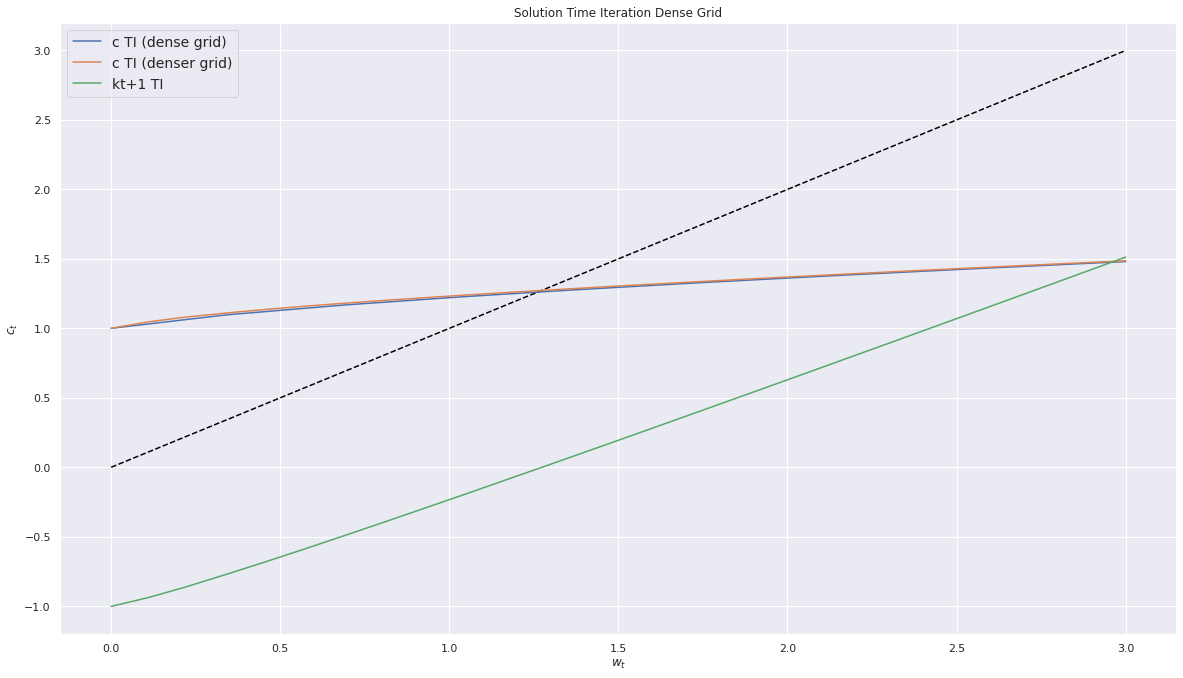

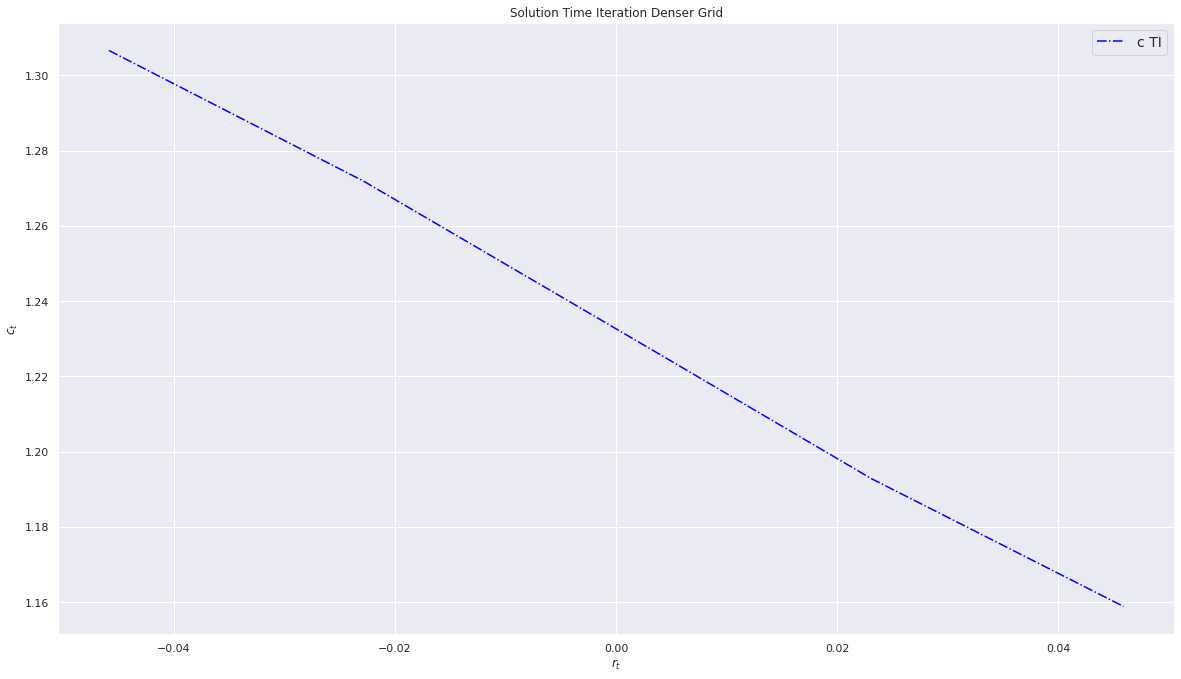

In [16]:
# Plot the result
len_wec = params_TI.nb_points_test

with torch.no_grad():
    rvec = 0.0*np.ones(len_wec) #np.zeros(len_wec)
    δvec = 0.0*np.ones(len_wec) #np.zeros(len_wec)
    wvec = params_TI.xvec_test

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen))))
    
    cvec_TI = params_TI.c_function_TI(state_next) #σ_func(state_next)
    # Save for latter use
    cvec_TI_denser_bc_0 = cvec_TI.copy()
    k_next_TI = wvec.squeeze(1) - cvec_TI
    wgrid_TI_denser_bc_0 = params_TI.w_grid.copy()

plt.plot(wvec, wvec, linestyle='--', color='black')
plt.plot(wvec, cvec_TI_bc_0, label='c TI (dense grid)')
plt.plot(wvec, cvec_TI_denser_bc_0, label='c TI (denser grid)')
plt.plot(wvec, k_next_TI, label='kt+1 TI')
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration Dense Grid")
plt.legend()
plt.show()

# Plot the result
len_wec = params_TI.nb_points_test

with torch.no_grad():
    rvec = np.linspace(params_TI.r_min, params_TI.r_max, len_wec)
    δvec = np.zeros(len_wec)
    wvec = np.ones(len_wec)

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
    cvec_TI_r_denser = params_TI.c_function_TI(state_next) 
    k_next_TI = wvec - cvec_TI

plt.plot(rvec, cvec_TI_r_denser, label='c TI', color="blue", linestyle="dashdot")
plt.xlabel("$r_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration Denser Grid")
plt.legend()

## I.B. Time iteration solution on sparse grid

In [17]:
%%time
grid_depth_chosen = 2
dim_p_chosen = 2
name_params = "params_sparse"
debug = False #Fit TI solution dense grid

params_sparse = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen, 
                  dim_p_chosen, grid_depth_chosen, nb_refinements_chosen, surplus_threshold_chosen,
                  name_params)

params_sparse.c_function_TI = params_TI.c_function_TI #Overwrite function using previous solution

# DEBUG:
# Fit TI solution
if debug==True:
    params_sparse.grid_old = Tasmanian.SparseGrid()
    params_sparse.grid_old.makeLocalPolynomialGrid(5, 1, 10, 1, "localp") 
    params_sparse.grid_old.setDomainTransform(params_sparse.domain_transform)
    params_sparse.grid_old_points = params_sparse.grid_old.getPoints()

# Initialization for sparse grid and TI
# initialize empty array
σ_sparse = np.zeros((params_sparse.grid_old_points.shape[0], params_sparse.grid_out))
print("Shape array: {}".format(σ_sparse.shape))

# Wage times 0.9
σ_sparse = 0.9*np.expand_dims(params_sparse.grid_old_points[:,0], 1)
    
# First interpolation
params_sparse.grid_old.loadNeededPoints(σ_sparse)

# Create function around interpolation object
def σ_sparse_interpolated(x):
    #return np.squeeze(params_sparse.grid_old.evaluateBatch(np.atleast_2d(x)), 1)
    return np.squeeze(params_sparse.grid_old.evaluateBatch(x), 1)

# Solve with a sparse grid
tol=0.0001
max_iter=100
verbose=True
print_skip = 1
i = 0
error = tol + 1

while i < max_iter:
    # If debug, fit TI solution
    if debug==True:
        σ_new_sparse = np.expand_dims(params_TI.c_function_TI(params_sparse.grid_old_points[:,:]), 1)
    else:
        # Update values based on past function
        σ_new_sparse = K_quadrature_sparse(σ_sparse, σ_sparse_interpolated, params_sparse, params_sparse.grid_old_points)
    # Here the grid is fixed
    # With adaptive sparse grid, test on other fixed grid
    error = np.max(np.abs(σ_sparse - σ_new_sparse))
    i += 1
    if verbose and i % print_skip == 0:
        print(f"Error at iteration {i} is {error}.")
    σ_sparse = copy.deepcopy(σ_new_sparse) # copy points
    
    # New interpolation object
    params_sparse.grid_old.loadNeededPoints(σ_sparse)
    
    # Update function
    #def σ_sparse_interpolated(x):
    #    return np.squeeze(params_sparse.grid_old.evaluateBatch(np.atleast_2d(x)), 1)

    if (error < tol) or (i == max_iter):
        if (error < tol):
            print("Convergence reached after {} iterations".format(i))
        if (i == max_iter):
            print("Convergence NOT reached after {} iterations".format(i))
        params_sparse.c_grid_TI_sparse = copy.deepcopy(σ_sparse) #value on grid
        params_sparse.c_function_TI_sparse = copy.deepcopy(σ_sparse_interpolated) #interpolation object (function)
        break

Shape array: (61, 1)
Error at iteration 1 is 1.2999999999999998.
Error at iteration 2 is 1.9716775575470171.
Error at iteration 3 is 1.710235145475928.
Error at iteration 4 is 0.7187050130539461.
Error at iteration 5 is 0.2761237090367974.
Error at iteration 6 is 0.12729775008320066.
Error at iteration 7 is 0.06342386517090293.
Error at iteration 8 is 0.04997092787459312.
Error at iteration 9 is 0.04172154675266271.
Error at iteration 10 is 0.03720176634949657.
Error at iteration 11 is 0.038645022960675735.
Error at iteration 12 is 0.025200474239923887.
Error at iteration 13 is 0.02912138721525115.
Error at iteration 14 is 0.02492556752121622.
Error at iteration 15 is 0.01622689415803169.
Error at iteration 16 is 0.013583974418644118.
Error at iteration 17 is 0.01091582135246294.
Error at iteration 18 is 0.008481885423718083.
Error at iteration 19 is 0.007797916588937026.
Error at iteration 20 is 0.006825726913653796.
Error at iteration 21 is 0.005691544120276948.
Error at iteration 22

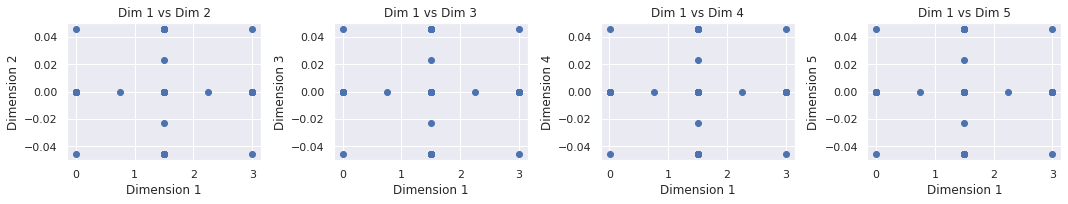

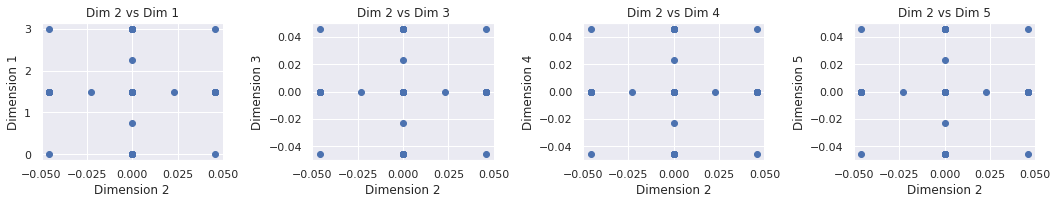

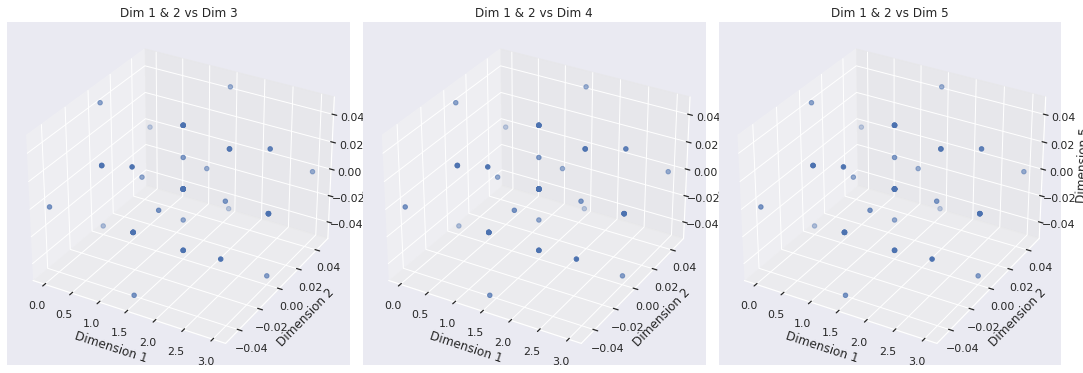

In [18]:
# Number of dimensions (columns) in the data
data = params_sparse.grid_old.getPoints()
num_dims = data.shape[1]

# Create a figure with subplots for each additional dimension
fig, axs = plt.subplots(1, num_dims - 1, figsize=(15, 3))

# Create a scatter plot for the first dimension against each other dimension
for i in range(1, num_dims):
    axs[i - 1].scatter(data[:, 0], data[:, i])
    axs[i - 1].set_xlabel('Dimension 1')
    axs[i - 1].set_ylabel(f'Dimension {i+1}')
    axs[i - 1].set_title(f'Dim 1 vs Dim {i+1}')

plt.tight_layout()
plt.show()

# Create a figure with subplots for each additional dimension, this time for the second dimension
fig, axs = plt.subplots(1, num_dims - 1, figsize=(15, 3))

# Create a scatter plot for the second dimension against each other dimension
for i in range(num_dims):
    if i != 1:  # Skip the second dimension itself
        axs[i if i < 1 else i - 1].scatter(data[:, 1], data[:, i])  # Adjust index for skipped column
        axs[i if i < 1 else i - 1].set_xlabel('Dimension 2')
        axs[i if i < 1 else i - 1].set_ylabel(f'Dimension {i+1}')
        axs[i if i < 1 else i - 1].set_title(f'Dim 2 vs Dim {i+1}')

plt.tight_layout()
plt.show()

# Create a figure with 3D subplots for each additional dimension beyond the first two
fig = plt.figure(figsize=(15, 10))
subplot_index = 1

# Generate 3D scatter plots for dimensions 1 and 2 against each other dimension
for i in range(2, num_dims):
    ax = fig.add_subplot(1, num_dims - 2, subplot_index, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, i])
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel(f'Dimension {i+1}')
    ax.set_title(f'Dim 1 & 2 vs Dim {i+1}')
    subplot_index += 1

plt.tight_layout()
plt.show()

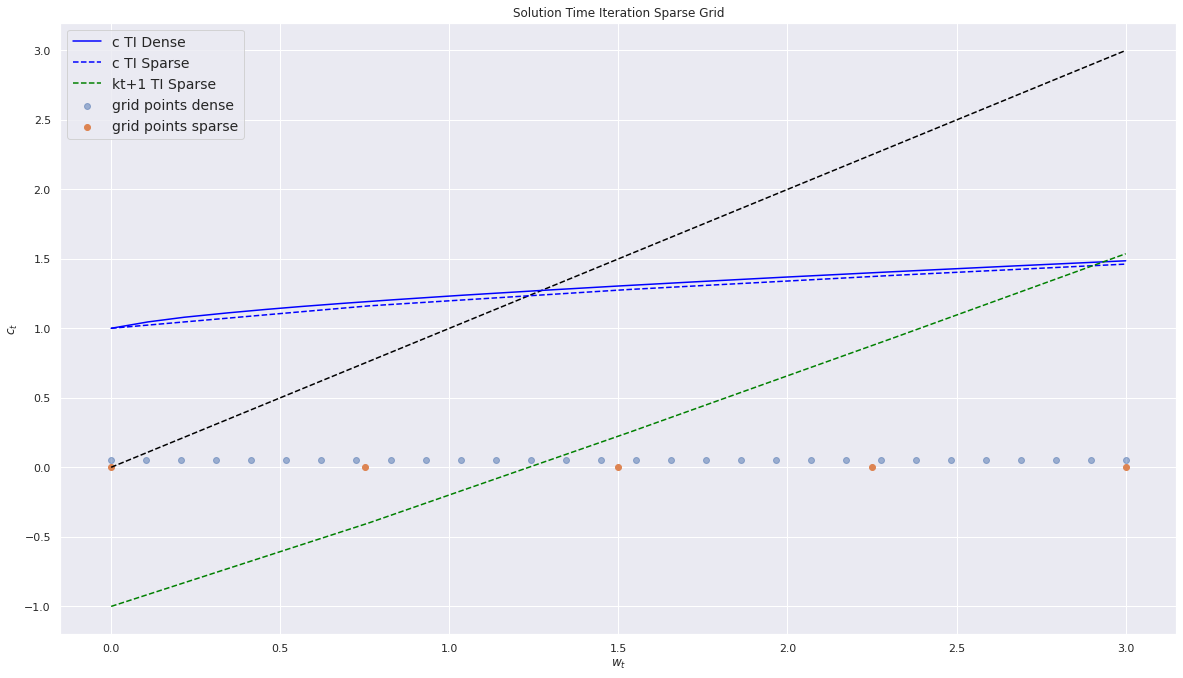

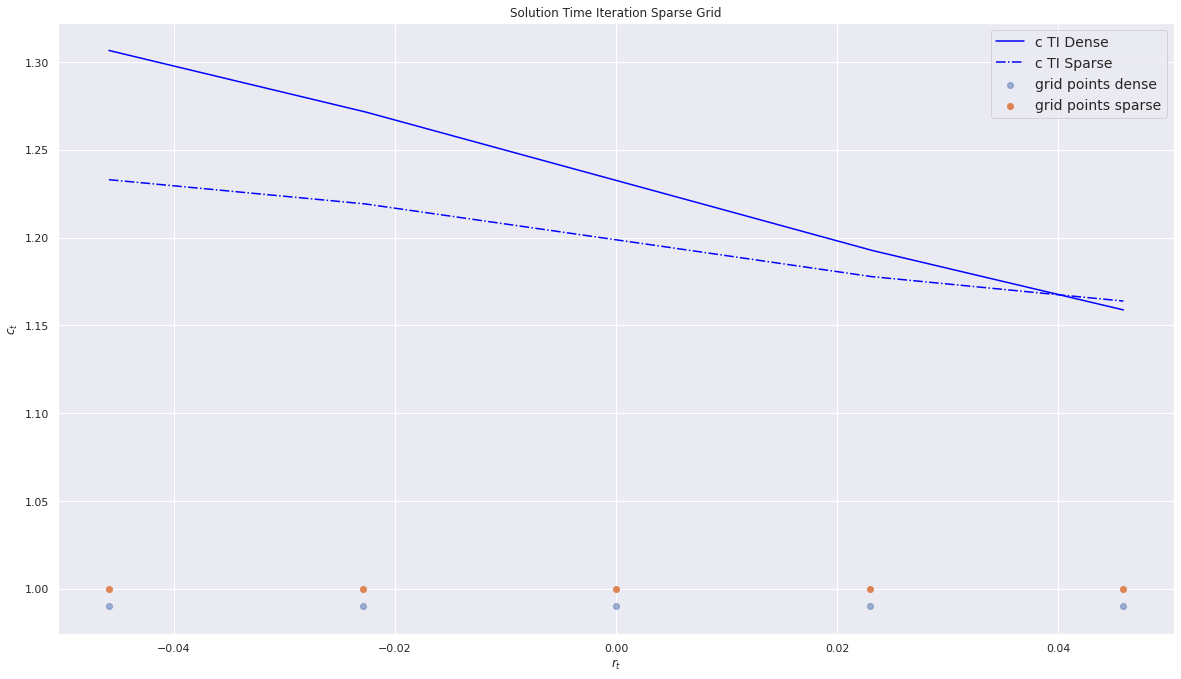

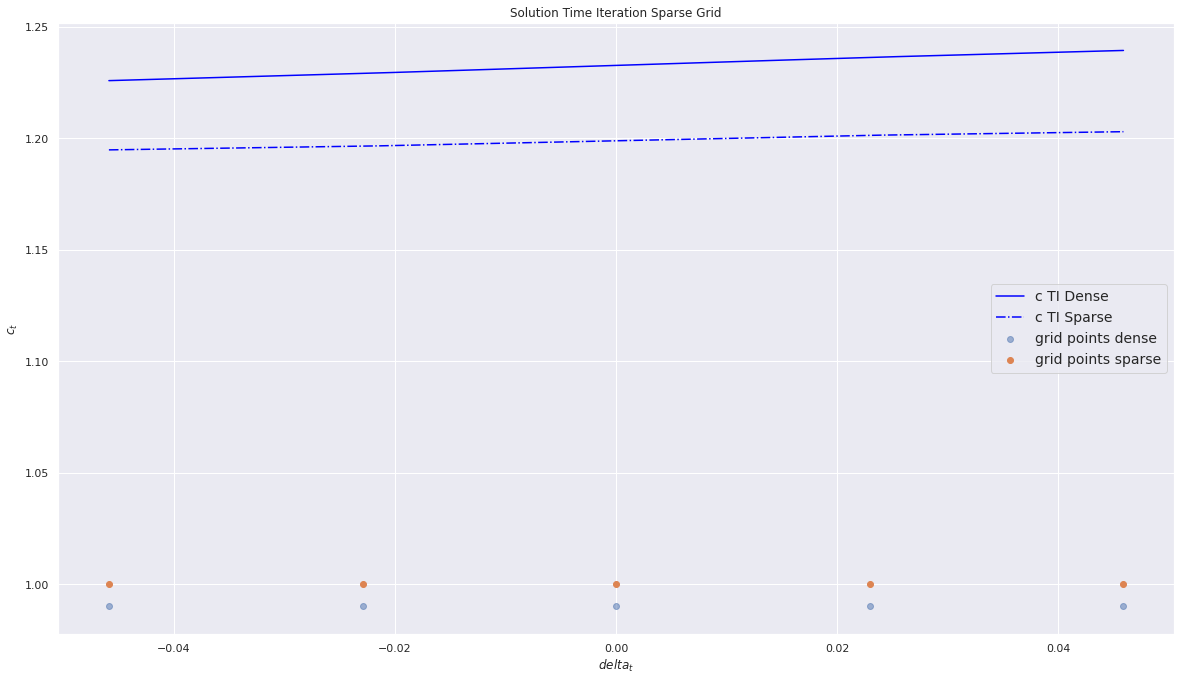

In [19]:
# Plot the result
len_wec = params_sparse.nb_points_test

with torch.no_grad():
    rvec = np.zeros(len_wec)
    δvec = np.zeros(len_wec)
    wvec = params_sparse.xvec_test

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
    cvec_TI = params_TI.c_function_TI(state_next) #σ_func(state_next)
    cvec_TI_sparse = params_sparse.c_function_TI_sparse(state_next) #σ_func(state_next)
    k_next_TI_sparse = wvec.squeeze(1) - cvec_TI_sparse

plt.title("Multidimensional Consumption-Savings (decision rule) BEFORE TRAINING")
plt.plot(wvec, wvec, linestyle='--', color='black')
plt.plot(wvec, cvec_TI, label='c TI Dense', color="blue")
plt.plot(wvec, cvec_TI_sparse, label='c TI Sparse', color="blue", linestyle="dashed")
plt.plot(wvec, k_next_TI_sparse, label='kt+1 TI Sparse', color="green", linestyle="dashed")
w_grid_sparse = np.unique(params_sparse.grid_old.getPoints()[:,0])
plt.scatter(params_TI.w_grid, 0.05*np.ones(len(params_TI.w_grid)), label="grid points dense", alpha=0.5)
plt.scatter(w_grid_sparse, np.zeros(len(w_grid_sparse)), label="grid points sparse")
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration Sparse Grid")
plt.legend()
plt.show()


with torch.no_grad():
    rvec = np.linspace(params_sparse.r_min, params_sparse.r_max, len_wec)
    δvec = np.zeros(len_wec)
    wvec = np.ones(len_wec)

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
    cvec_TI = params_TI.c_function_TI(state_next) #σ_func(state_next)
    cvec_TI_sparse = params_sparse.c_function_TI_sparse(state_next) 
    k_next_TI = wvec - cvec_TI

plt.plot(rvec, cvec_TI, label='c TI Dense', color="blue")
plt.plot(rvec, cvec_TI_sparse, label='c TI Sparse', color="blue", linestyle="dashdot")
#Order of the loop: w, r, delta, p1, p2, ..., pn
plt.scatter(params_TI.r_grid, 0.99*np.ones(len(params_TI.r_grid)), label="grid points dense", alpha=0.5)
r_grid_sparse = np.unique(params_sparse.grid_old.getPoints()[:,1])
plt.scatter(r_grid_sparse, np.ones(len(r_grid_sparse)), label="grid points sparse")
plt.xlabel("$r_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration Sparse Grid")
plt.legend()
plt.show()

with torch.no_grad():
    rvec = np.zeros(len_wec)
    δvec = np.linspace(params_sparse.δ_min, params_sparse.δ_max, len_wec)
    wvec = np.ones(len_wec)

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
    cvec_TI = params_TI.c_function_TI(state_next) #σ_func(state_next)
    cvec_TI_sparse = params_sparse.c_function_TI_sparse(state_next) 
    k_next_TI = wvec - cvec_TI

plt.plot(δvec, cvec_TI, label='c TI Dense', color="blue")
plt.plot(δvec, cvec_TI_sparse, label='c TI Sparse', color="blue", linestyle="dashdot")
#Order of the loop: w, r, delta, p1, p2, ..., pn
plt.scatter(params_TI.δ_grid, 0.99*np.ones(len(params_TI.δ_grid)), label="grid points dense", alpha=0.5)
δ_grid_sparse = np.unique(params_sparse.grid_old.getPoints()[:,1])
plt.scatter(δ_grid_sparse, np.ones(len(δ_grid_sparse)), label="grid points sparse")
plt.xlabel("$delta_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration Sparse Grid")
plt.legend()

Euler TI Sparse
Mean: 0.01089534072259081
Median: 0.005658819683755256
Min: 7.422895067943358e-06
Max: 0.09707577002079404
std dev.: 0.014207607534117036

Euler Bis TI Sparse
Mean: 0.005549695116739185
Median: 0.0028405653339494408
Min: 3.71142687172199e-06
Max: 0.05238426564961829
std dev.: 0.007389031632650421


Text(0.5, 1.0, 'Euler Error Adaptive Sparse Grid (Monte-Carlo)')

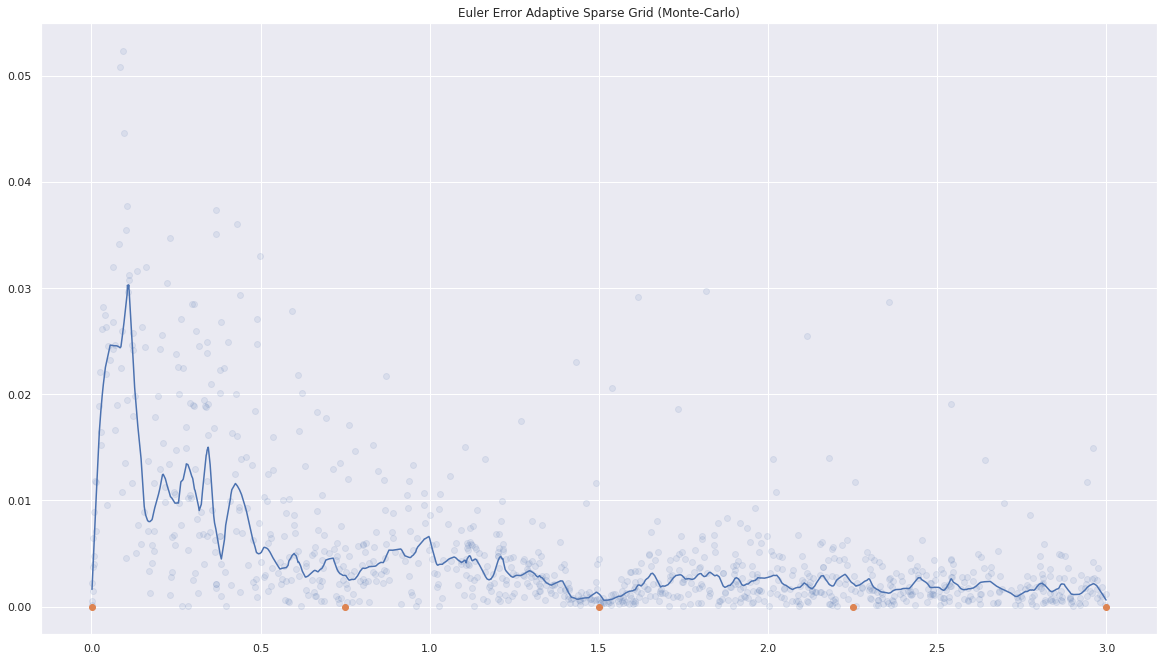

In [20]:
# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_TI_MC_sparse(1000, 1000, params_sparse)

print("Euler TI Sparse")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("\nEuler Bis TI Sparse")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))

# Smoothed conditional mean
smoothed = lowess(euler_bis, w, frac=1./50)
plt.scatter(w, euler_bis, alpha=0.1)
w_grid_sparse = np.unique(params_sparse.grid_old.getPoints()[:,0])
plt.scatter(w_grid_sparse, np.zeros(len(w_grid_sparse)), label="grid points")
plt.plot(smoothed[:,0], smoothed[:,1])
plt.title("Euler Error Adaptive Sparse Grid (Monte-Carlo)")

Euler TI
Mean: 0.01111430998909394
Median: 0.005525946306255858
Min: 3.827095042541195e-06
Max: 0.1168713893929978
std dev.: 0.014942487937417098

Euler Bis TI
Mean: 0.005676781789623643
Median: 0.0027698680117405616
Min: 1.9135530138214563e-06
Max: 0.06411367067454021
std dev.: 0.00781803485532807


Text(0.5, 1.0, 'Euler Error Sparse Grid (Gaussian quadrature)')

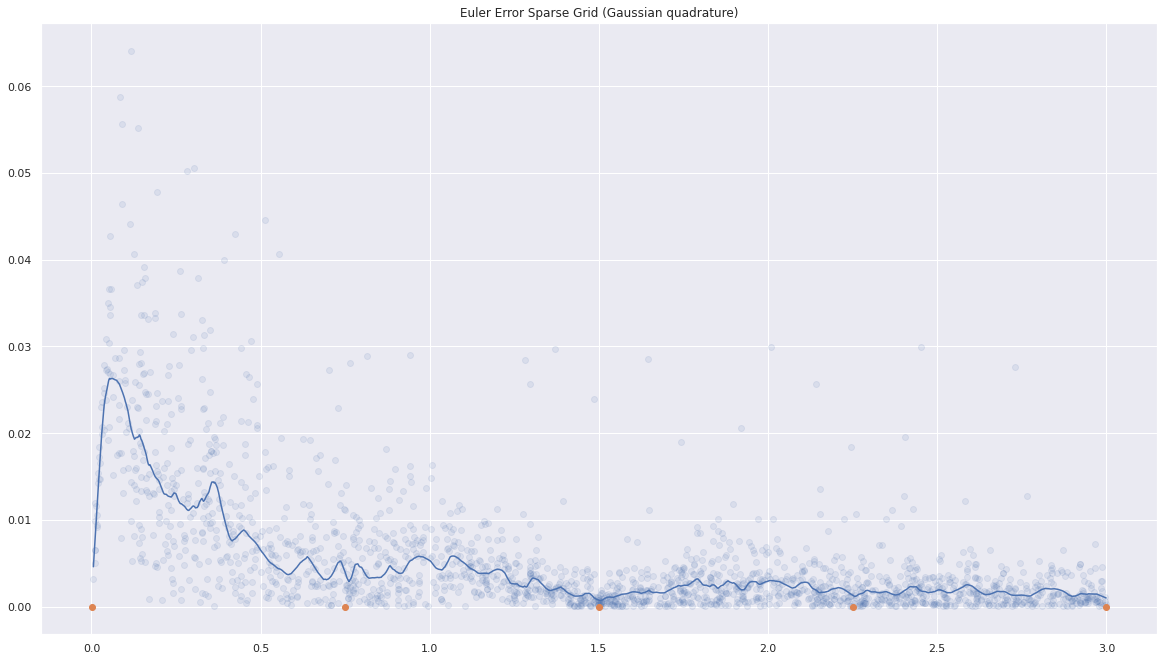

In [21]:
# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_TI_Gaussian_sparse(2000, params_sparse, debug=False)

print("Euler TI")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("\nEuler Bis TI")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))

# Smoothed conditional mean
smoothed = lowess(euler_bis, w, frac=1./50)
plt.scatter(w, euler_bis, alpha=0.1)
plt.scatter(w_grid_sparse, np.zeros(len(w_grid_sparse)), label="grid points")
plt.plot(smoothed[:,0], smoothed[:,1])
plt.title("Euler Error Sparse Grid (Gaussian quadrature)")

---
---

# Adaptive Sparse Grid and Time Iteration

Refine selectively the sparse grid

Shape array: (61, 1)
Refinement: 0. Needed points: 61
Refinement: 1. Needed points: 97
Iter 1 Diff : 1.2999999999999998
Refinement: 0. Needed points: 61
Refinement: 1. Needed points: 152
Iter 2 Diff : 2.316865748776794
Refinement: 0. Needed points: 61
Refinement: 1. Needed points: 143
Iter 3 Diff : 1.6614548198487724
Refinement: 0. Needed points: 61
Refinement: 1. Needed points: 152
Iter 4 Diff : 1.6614548198487724
Refinement: 0. Needed points: 61
Refinement: 1. Needed points: 152
Iter 5 Diff : 1.6855702220745443
Refinement: 0. Needed points: 61
Refinement: 1. Needed points: 121
Iter 6 Diff : 2.8016174886068073
Refinement: 0. Needed points: 61
Refinement: 1. Needed points: 156
Iter 7 Diff : 2.12471378568406
Refinement: 0. Needed points: 61
Refinement: 1. Needed points: 152
Iter 8 Diff : 2.824381115989947
Refinement: 0. Needed points: 61
Refinement: 1. Needed points: 144
Iter 9 Diff : 2.2464651638797433
Refinement: 0. Needed points: 61
Refinement: 1. Needed points: 156
Iter 10 Diff : 1.

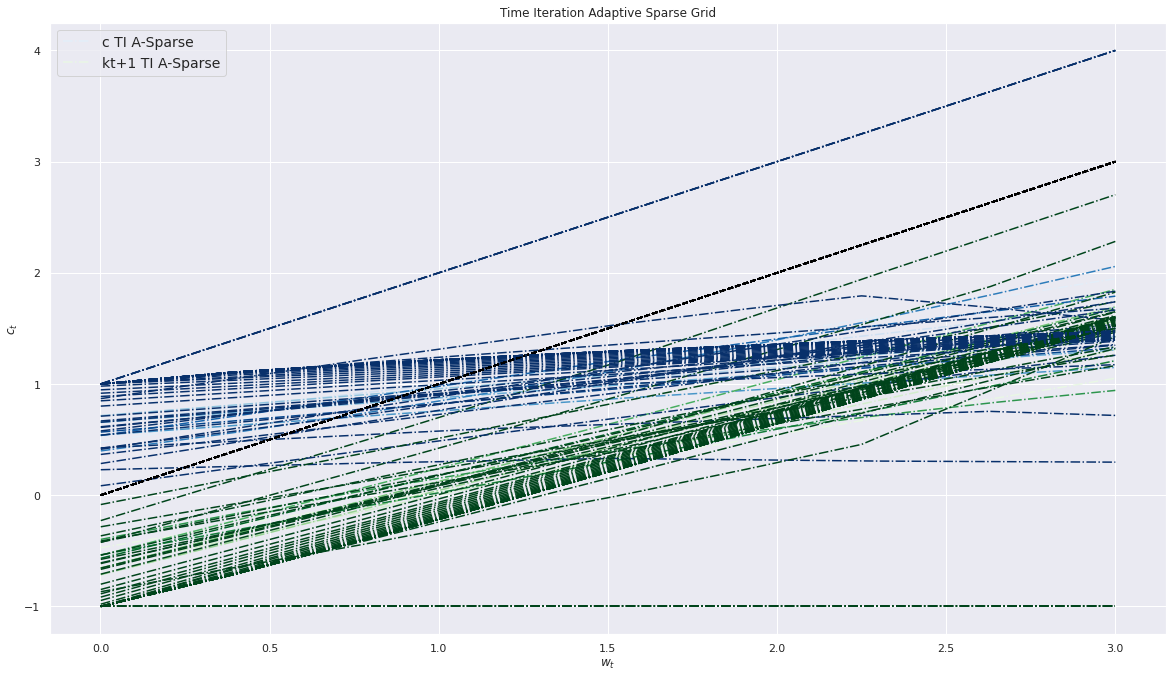

CPU times: user 2min 38s, sys: 289 ms, total: 2min 38s
Wall time: 14 s


In [22]:
%%time

## Combination that works: 
## DEFAULT: 2, 2, 1e-3 works
# 1, 3, 1e-3 works
# 3, 5, 1e-3 works
grid_depth_chosen = 2 #depth of the initial sparse grid 
nb_refinements_chosen = 2 #5
surplus_threshold_chosen = 1e-2 #control which points are added or not
plot_iteration = True #plot successive iterations
name_params = "params_asparse"

params_asparse = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen, 
                  dim_p_chosen, grid_depth_chosen, nb_refinements_chosen, surplus_threshold_chosen,
                  name_params)

 
params_asparse.c_function_TI = params_TI.c_function_TI #Overwrite function using previous solution

# Initialization for sparse grid and TI
# initialize empty array
σ_asparse = np.zeros((params_asparse.grid_old_points.shape[0], params_asparse.grid_out))
print("Shape array: {}".format(σ_asparse.shape))

# Wage times 0.9
σ_asparse = 0.9*np.expand_dims(params_asparse.grid_old_points[:,0], 1)
    
# First interpolation
params_asparse.grid_old.loadNeededPoints(σ_asparse)

# Create function around interpolation object
def σ_asparse_interpolated(x):
    #return np.squeeze(params_sparse.grid_old.evaluateBatch(np.atleast_2d(x)), 1)
    return np.squeeze(params_asparse.grid_old.evaluateBatch(x), 1)

# Test points:
σ_old_test = σ_asparse_interpolated(params_asparse.grid_test_points)
    
# Create a grid that is copied at each iteration, before being refined
grid_to_copy = Tasmanian.makeLocalPolynomialGrid(params_asparse.grid_dim, params_asparse.grid_out, 
                                                 params_asparse.grid_depth, params_asparse.grid_order, 
                                                 params_asparse.grid_rule)

grid_to_copy.setDomainTransform(params_asparse.domain_transform)
    
# Solve with a sparse grid
tol= 0.0001
max_iter=100
verbose=True
print_skip = 1
i = 0
error = tol + 1
show_every = 1
verbosity = 1 #To display more info on the sparse grid

colors_cvec = cm.Blues(10*np.linspace(0, 1, max_iter))
colors_knext = cm.Greens(10*np.linspace(0, 1, max_iter))
    
if plot_iteration == True:
    # Initialize plot outside the loop
    plt.figure()
    plt.xlabel("$w_t$")
    plt.ylabel("$c_t$")
    plt.title("Time Iteration Adaptive Sparse Grid")
    
# I. Loop for value function iteration
convergence_reached = 0
while (convergence_reached == 0) and (i < max_iter):
    i+=1
    
    # Create a fresh grid
    #grid_new = Tasmanian.makeLocalPolynomialGrid(params.grid_dim, params.grid_out, params.grid_depth, params.grid_order, params.grid_rule)
    #grid_new.setDomainTransform(params.domain_transform)
    grid_new = Tasmanian.copyGrid(grid_to_copy)

    # Keep track of the number of points on grid as we refine it
    num_points = [] 
    # II. Loop over refinement:
    i_refinement = 0
    while ((grid_new.getNumNeeded() > 0) and (i_refinement<=params_asparse.nb_refinements-1)):
        
        grid_new_points = grid_new.getNeededPoints()
        num_points_to_add = grid_new.getNumNeeded() 
        num_points.append(grid_new_points)
        if verbosity==1:
            print("Refinement: {}. Needed points: {}".format(i_refinement, grid_new.getNumNeeded()))
        i_refinement+=1
        
        # Update values based on past function
        σ_asparse_new = K_quadrature_sparse(σ_asparse, σ_asparse_interpolated, params_asparse, grid_new_points)
        
        # Load function values into the grid structure
        grid_new.loadNeededPoints(σ_asparse_new)
        
        # Refine
        # Other options: "stable", "fds"
        grid_new.setSurplusRefinement(params_asparse.surplus_threshold, -1, "classic")
        # grid_new.setSurplusRefinement(params_asparse.surplus_threshold, -1, "fds")
        
    # Update the grid
    # print("updating grid")
    params_asparse.grid_old = Tasmanian.copyGrid(grid_new)

    # Test new interpolation on a fixed grid
    σ_new_test = σ_asparse_interpolated(params_asparse.grid_test_points)
    diff = np.max(np.abs(σ_new_test - σ_old_test))

    if i % show_every == 0:
        print(f"Iter {i} Diff : {diff}")

    if diff < tol:
        print(f"Iter {i} Convergence reached")
        convergence_reached = 1
        params_asparse.c_grid_TI_sparse = σ_new_test #value on grid
        params_asparse.c_function_TI_sparse = σ_asparse_interpolated #interpolation object (function)
        params_asparse.grid_old_points = params_asparse.grid_old.getPoints() #Update grid points
    if (i == max_iter):
        print("Convergence NOT reached after {} iterations".format(i))
        
    #Update
    σ_old_test = σ_new_test.copy()   
    
    if plot_iteration == True:
        # Plot the result
        len_wec = params_asparse.nb_points_test

        with torch.no_grad():
            rvec = np.zeros(len_wec)
            δvec = np.zeros(len_wec)
            wvec = params_asparse.xvec_test

            wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
            state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
            cvec_TI_asparse = σ_asparse_interpolated(state_next) #σ_func(state_next)
            k_next_TI_asparse = wvec.squeeze(1) - cvec_TI_asparse

        plt.plot(wvec, wvec, linestyle='--', color='black')
        if i==1:
            plt.plot(wvec, cvec_TI_asparse, label=f"c TI A-Sparse", color=colors_cvec[i], linestyle="dashdot")
            plt.plot(wvec, k_next_TI_asparse, label=f"kt+1 TI A-Sparse", color=colors_knext[i], linestyle="dashdot")
        else:
            plt.plot(wvec, cvec_TI_asparse, color=colors_cvec[i], linestyle="dashdot")
            plt.plot(wvec, k_next_TI_asparse, color=colors_knext[i], linestyle="dashdot")
        

plt.legend()
plt.show()
        
# Save grid object ot disk
params_asparse.grid_old.write(output_folder + "a-sparse_grid")

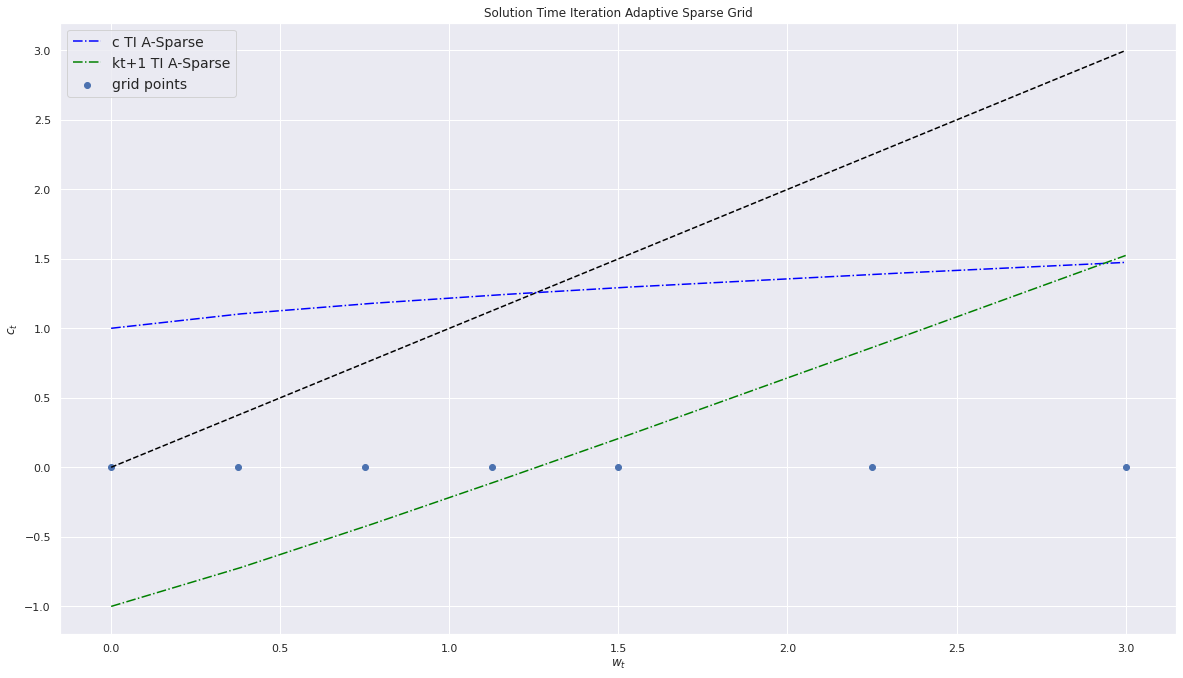

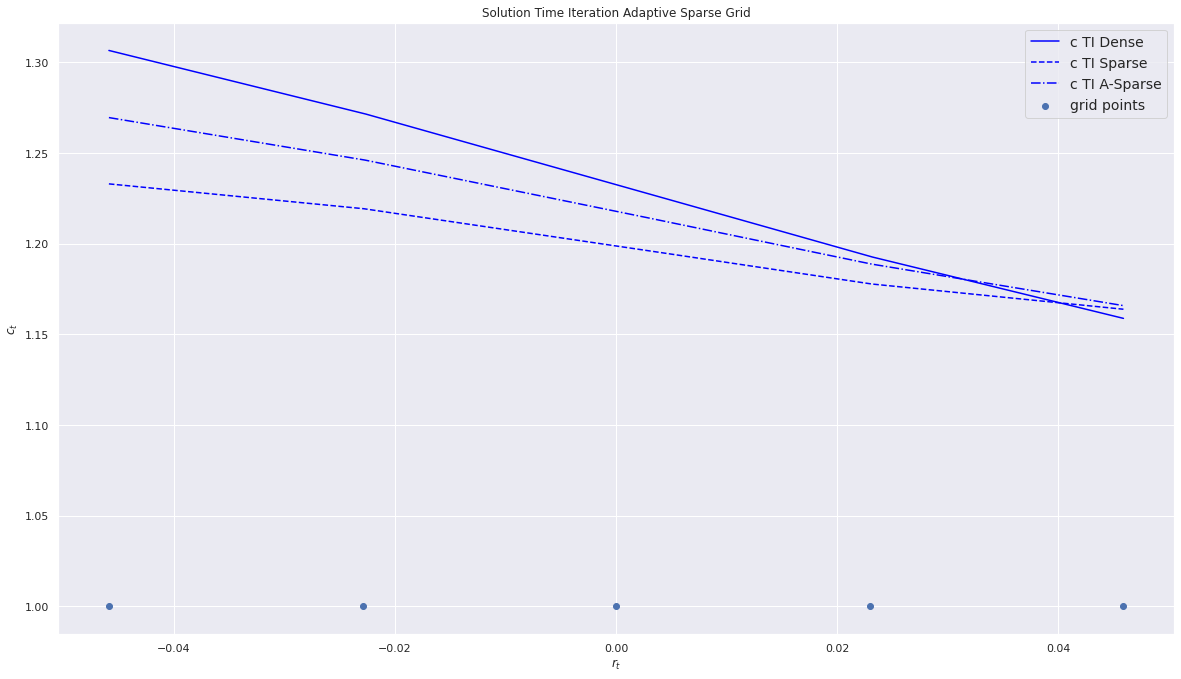

In [23]:
# Plot the result
len_wec = params_asparse.nb_points_test

with torch.no_grad():
    rvec = np.zeros(len_wec) 
    δvec = np.zeros(len_wec)
    wvec = params_asparse.xvec_test

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
    cvec_TI_asparse = params_asparse.c_function_TI_sparse(state_next) #σ_func(state_next)
    k_next_TI_asparse = wvec.squeeze(1) - cvec_TI_asparse

plt.plot(wvec, wvec, linestyle='--', color='black')
plt.plot(wvec, cvec_TI_asparse, label='c TI A-Sparse', color="blue", linestyle="dashdot")
plt.plot(wvec, k_next_TI_asparse, label='kt+1 TI A-Sparse', color="green", linestyle="dashdot")
w_grid_sparse = np.unique(params_asparse.grid_old.getPoints()[:,0])
plt.scatter(w_grid_sparse, np.zeros(len(w_grid_sparse)), label="grid points")
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration Adaptive Sparse Grid")
plt.legend()
plt.show()

cvec_TI_asparse_copy = copy.deepcopy(cvec_TI_asparse)

# Plot the result
len_wec = params_asparse.nb_points_test

with torch.no_grad():
    rvec = np.linspace(params_asparse.r_min, params_asparse.r_max, len_wec)
    δvec = np.zeros(len_wec)
    wvec = np.ones(len_wec)

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
    cvec_TI = params_TI.c_function_TI(state_next)
    cvec_TI_sparse = params_sparse.c_function_TI_sparse(state_next) 
    cvec_TI_asparse = params_asparse.c_function_TI_sparse(state_next)
    k_next_TI_asparse = wvec - cvec_TI_asparse

plt.plot(rvec, cvec_TI, label='c TI Dense', color="blue")
plt.plot(rvec, cvec_TI_sparse, label='c TI Sparse', color="blue", linestyle="--")
plt.plot(rvec, cvec_TI_asparse, label='c TI A-Sparse', color="blue", linestyle="dashdot")
r_grid_sparse = np.unique(params_asparse.grid_old.getPoints()[:,1])
plt.scatter(r_grid_sparse, np.ones(len(r_grid_sparse)), label="grid points")
plt.xlabel("$r_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration Adaptive Sparse Grid")
plt.legend()



Euler TI A-Sparse
Mean: 0.007723390436107688
Median: 0.003773105317876835
Min: 4.5029503490390255e-06
Max: 0.07843459881698811
std dev.: 0.01123516514029348

Euler Bis TI A-Sparse
Mean: 0.0039109732337081465
Median: 0.001886591675729854
Min: 2.2514827784370084e-06
Max: 0.041686220404280716
std dev.: 0.005782351934269102


Text(0.5, 1.0, 'Euler Error Adaptive Sparse Grid (Monte-Carlo)')

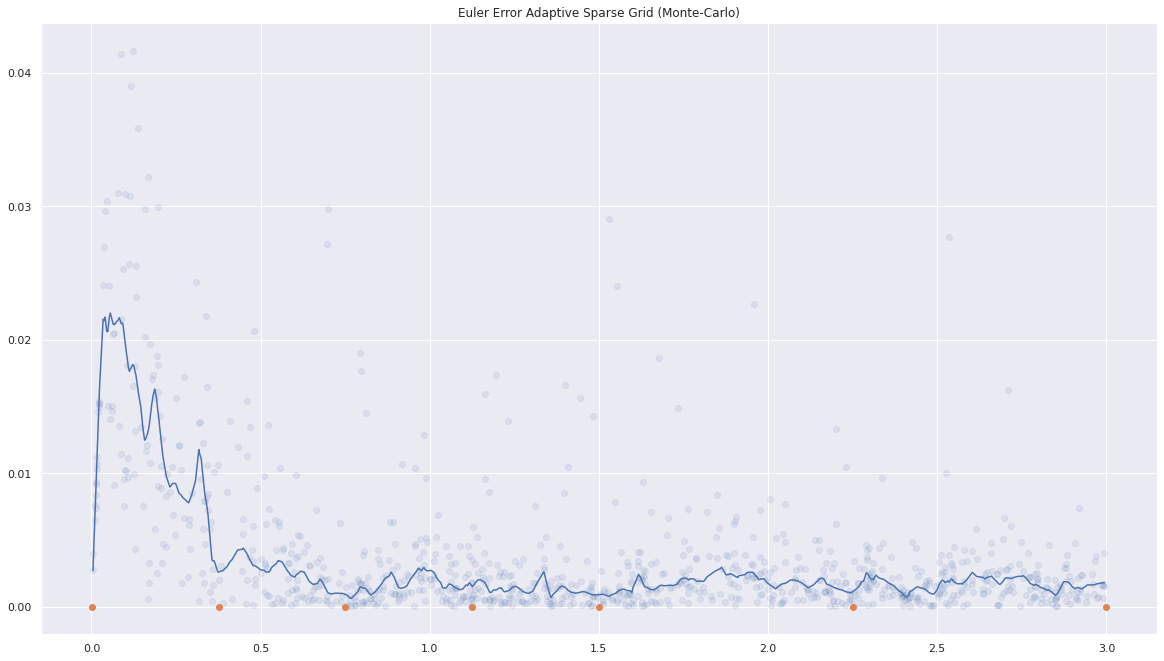

In [24]:
# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_TI_MC_sparse(1000, 1000, params_asparse)

print("Euler TI A-Sparse")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("\nEuler Bis TI A-Sparse")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))

# Smoothed conditional mean
smoothed = lowess(euler_bis, w, frac=1./50)
plt.scatter(w, euler_bis, alpha=0.1)
w_grid_asparse = np.unique(params_asparse.grid_old.getPoints()[:,0])
plt.scatter(w_grid_asparse, np.zeros(len(w_grid_sparse)), label="grid points")
plt.plot(smoothed[:,0], smoothed[:,1])
plt.title("Euler Error Adaptive Sparse Grid (Monte-Carlo)")

Euler TI A-Sparse
Mean: 0.008087591075433885
Median: 0.00387705605688915
Min: 9.455815569769932e-06
Max: 0.11307284590493949
std dev.: 0.012082773363531729

Euler Bis TI A-Sparse
Mean: 0.0041025447114422615
Median: 0.0019419091886958562
Min: 4.727941314897066e-06
Max: 0.061832525487470535
std dev.: 0.006259082795210789


Text(0.5, 1.0, 'Euler Error Sparse Grid (Gaussian quadrature)')

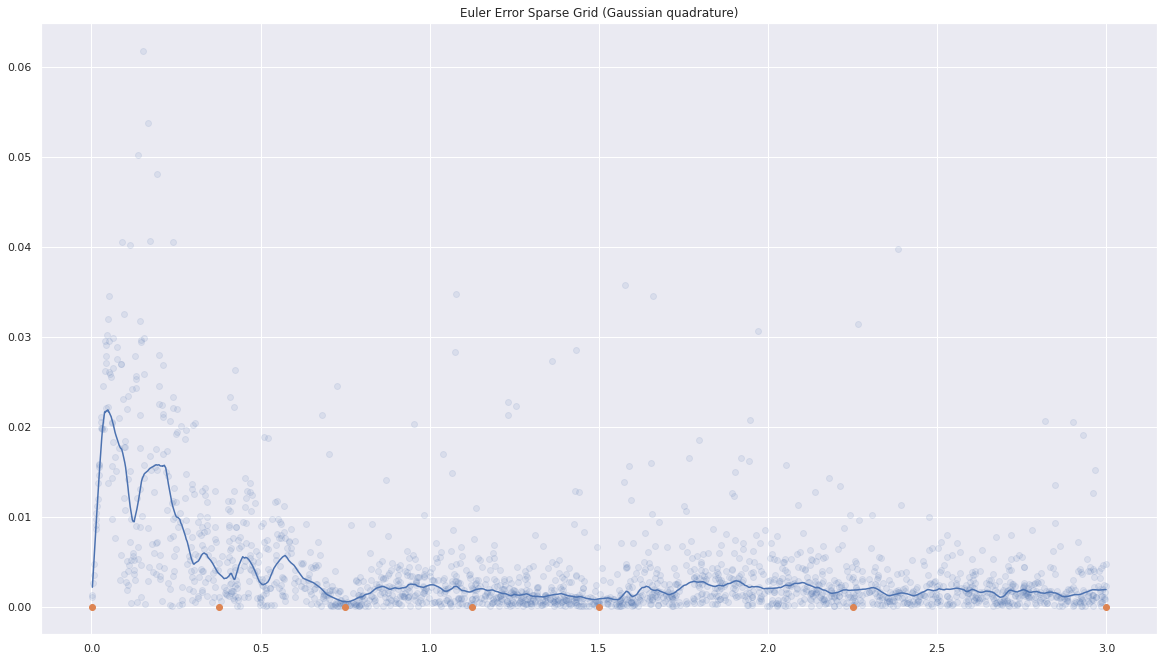

In [25]:
# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_TI_Gaussian_sparse(2000, params_asparse, debug=False)

print("Euler TI A-Sparse")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("\nEuler Bis TI A-Sparse")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))

# Smoothed conditional mean
smoothed = lowess(euler_bis, w, frac=1./50)
plt.scatter(w, euler_bis, alpha=0.1)
plt.scatter(w_grid_asparse, np.zeros(len(w_grid_sparse)), label="grid points")
plt.plot(smoothed[:,0], smoothed[:,1])
plt.title("Euler Error Sparse Grid (Gaussian quadrature)")

## Illustrate the sparse grid

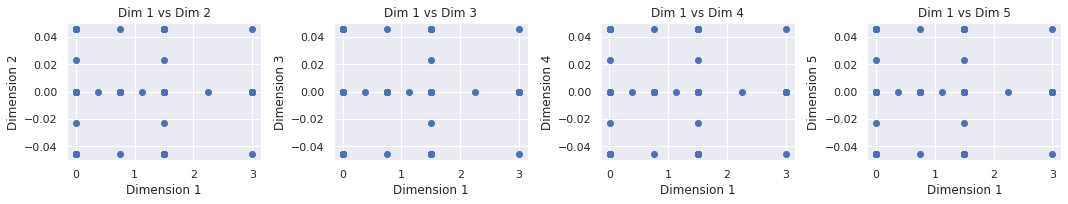

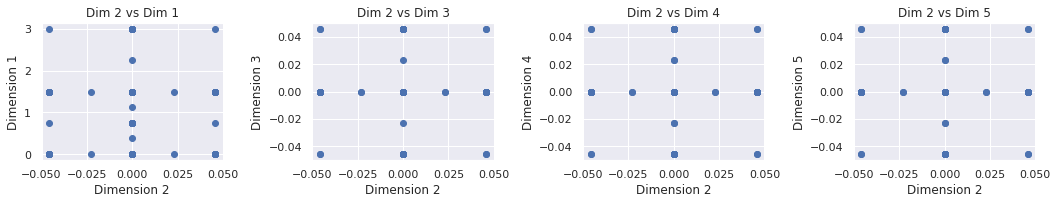

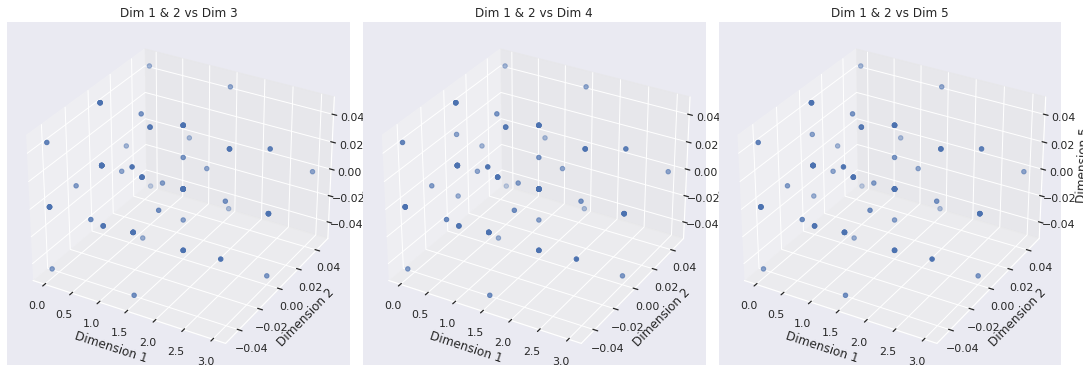

In [26]:
# Number of dimensions (columns) in the data
data = params_asparse.grid_old.getPoints()
num_dims = data.shape[1]

# Create a figure with subplots for each additional dimension
fig, axs = plt.subplots(1, num_dims - 1, figsize=(15, 3))

# Create a scatter plot for the first dimension against each other dimension
for i in range(1, num_dims):
    axs[i - 1].scatter(data[:, 0], data[:, i])
    axs[i - 1].set_xlabel('Dimension 1')
    axs[i - 1].set_ylabel(f'Dimension {i+1}')
    axs[i - 1].set_title(f'Dim 1 vs Dim {i+1}')

plt.tight_layout()
plt.show()

# Create a figure with subplots for each additional dimension, this time for the second dimension
fig, axs = plt.subplots(1, num_dims - 1, figsize=(15, 3))

# Create a scatter plot for the second dimension against each other dimension
for i in range(num_dims):
    if i != 1:  # Skip the second dimension itself
        axs[i if i < 1 else i - 1].scatter(data[:, 1], data[:, i])  # Adjust index for skipped column
        axs[i if i < 1 else i - 1].set_xlabel('Dimension 2')
        axs[i if i < 1 else i - 1].set_ylabel(f'Dimension {i+1}')
        axs[i if i < 1 else i - 1].set_title(f'Dim 2 vs Dim {i+1}')

plt.tight_layout()
plt.show()


# Create a figure with 3D subplots for each additional dimension beyond the first two
fig = plt.figure(figsize=(15, 10))
subplot_index = 1

# Generate 3D scatter plots for dimensions 1 and 2 against each other dimension
for i in range(2, num_dims):
    ax = fig.add_subplot(1, num_dims - 2, subplot_index, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, i])
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel(f'Dimension {i+1}')
    ax.set_title(f'Dim 1 & 2 vs Dim {i+1}')
    subplot_index += 1

plt.tight_layout()
plt.show()


(101, 5)


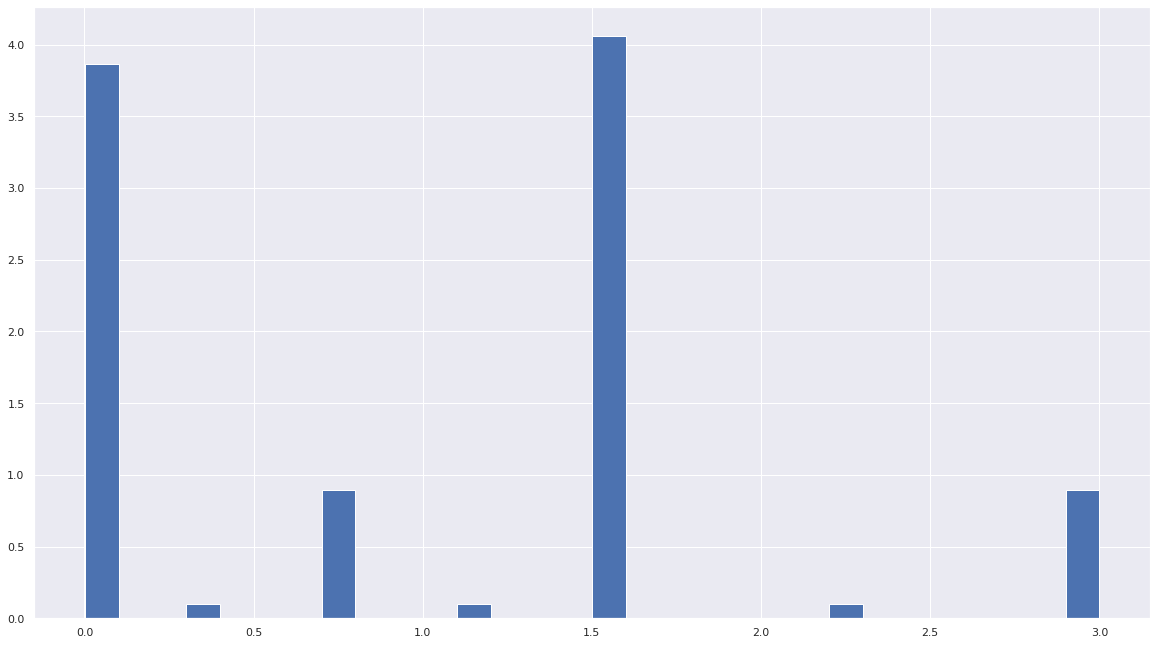

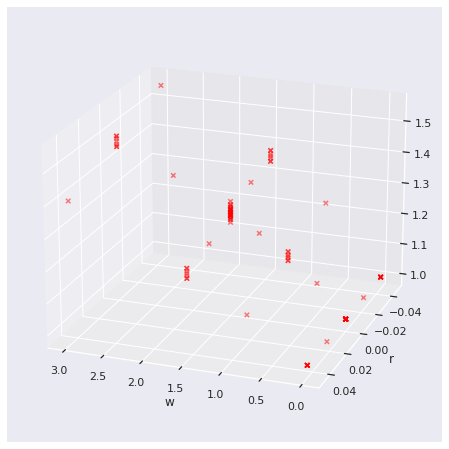

In [27]:
points = params_asparse.grid_old.getPoints()
print(points.shape)
plt.hist(points[:,0], bins=30, density=True)

vals = params_asparse.c_function_TI_sparse(points)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(points[:,0], points[:,1], vals, marker='x',color='red',alpha=0.5)
ax.set_ylabel("r")
ax.set_xlabel("w")
ax.view_init(20, 110)

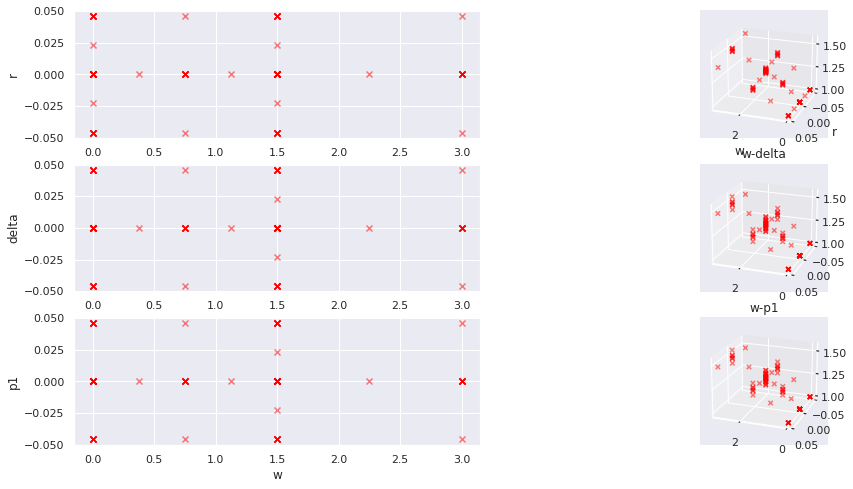

In [28]:
## Order:  w, r, delta, p1, p2, ..., pn
fig = plt.figure(figsize=(16,8))
# First subplot
ax = fig.add_subplot(3,2,1)
ax.scatter(points[:,0],points[:,1],marker='x',color='red',alpha=0.5)
ax.set_ylabel("r")
ax.set_xlabel("w")

# Second subplot
ax = fig.add_subplot(3,2,2, projection='3d')
ax.scatter(points[:,0], points[:,1], vals, marker='x',color='red',alpha=0.5)
ax.set_ylabel("r")
ax.set_xlabel("w")
ax.view_init(20, 110)

ax = fig.add_subplot(3,2,3)
ax.scatter(points[:,0],points[:,2],marker='x',color='red',alpha=0.5)
ax.set_ylabel("delta")
ax.set_xlabel("w")

# Second subplot
ax = fig.add_subplot(3,2,4, projection='3d')
ax.scatter(points[:,0], points[:,2], vals, marker='x',color='red',alpha=0.5)
ax.set_title("w-delta")
ax.view_init(20, 110)

ax = fig.add_subplot(3,2,5)
ax.scatter(points[:,0],points[:,2],marker='x',color='red',alpha=0.5)
ax.set_ylabel("p1")
ax.set_xlabel("w")

# Second subplot
ax = fig.add_subplot(3,2,6, projection='3d')
ax.scatter(points[:,0], points[:,2], vals, marker='x',color='red',alpha=0.5)
ax.set_title("w-p1")
ax.view_init(20, 110)

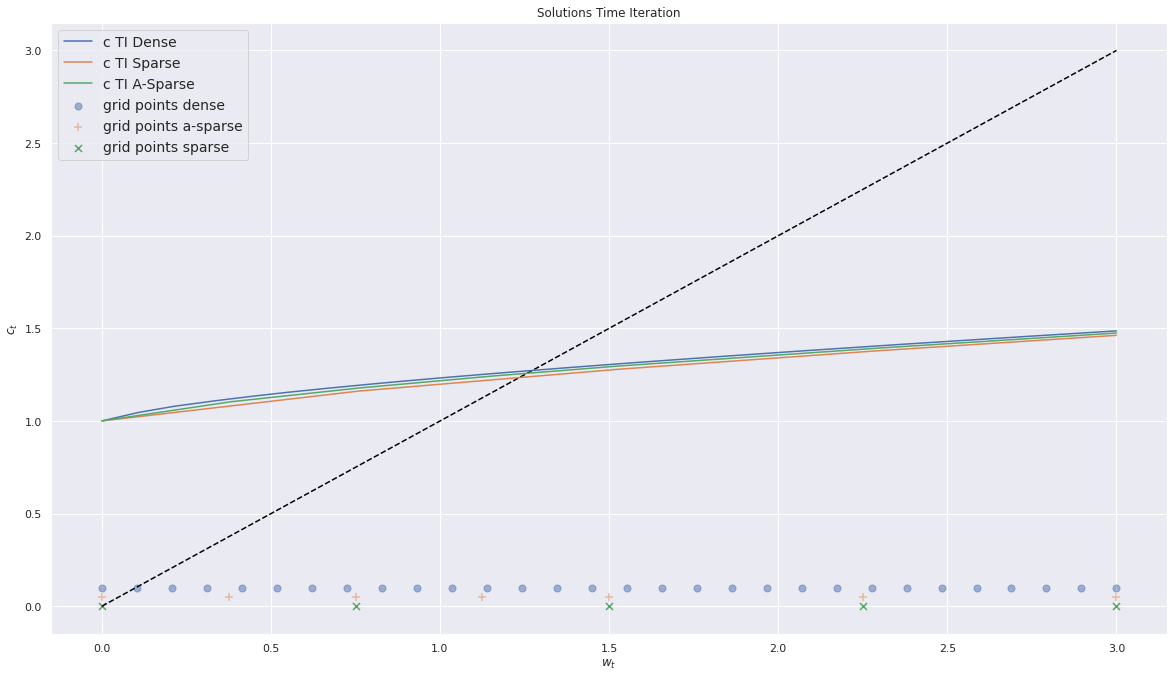

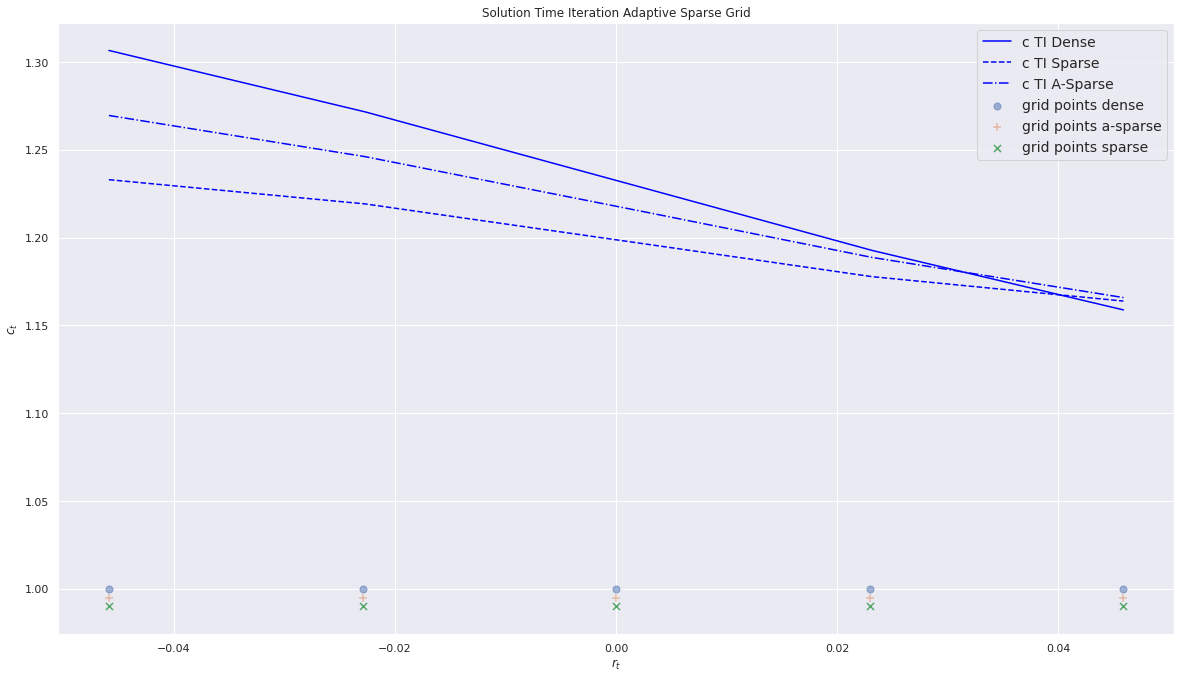

In [29]:
# Plot the result
len_wec = params_asparse.nb_points_test

with torch.no_grad():
    rvec = np.zeros(len_wec) 
    δvec = np.zeros(len_wec)
    wvec = params_asparse.xvec_test

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
    cvec_TI = params_TI.c_function_TI(state_next) 
    cvec_TI_sparse = params_sparse.c_function_TI_sparse(state_next) 
    cvec_TI_asparse = params_asparse.c_function_TI_sparse(state_next) 
    k_next_TI_asparse = wvec.squeeze(1) - cvec_TI_asparse

plt.plot(wvec, wvec, linestyle='--', color='black')
plt.plot(wvec, cvec_TI, label='c TI Dense')
plt.plot(wvec, cvec_TI_sparse, label='c TI Sparse')
plt.plot(wvec, cvec_TI_asparse, label='c TI A-Sparse')

w_grid_asparse = np.unique(params_asparse.grid_old.getPoints()[:,0])
w_grid_sparse = np.unique(params_sparse.grid_old.getPoints()[:,0])
plt.scatter(params_TI.w_grid, 0.1*np.ones(len(params_TI.w_grid)), label="grid points dense", alpha=0.5, s=50)
plt.scatter(w_grid_asparse, 0.05*np.ones(len(w_grid_asparse)), label="grid points a-sparse", alpha=0.5, s=50, marker="+")
plt.scatter(w_grid_sparse, np.zeros(len(w_grid_sparse)), label="grid points sparse", alpha=1.0, s=50, marker="x")

plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.title("Solutions Time Iteration")
plt.legend()
plt.show()

with torch.no_grad():
    rvec = np.linspace(params_asparse.r_min, params_asparse.r_max, len_wec)
    δvec = np.zeros(len_wec)
    wvec = np.ones(len_wec)

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
    cvec_TI = params_TI.c_function_TI(state_next)
    cvec_TI_sparse = params_sparse.c_function_TI_sparse(state_next) 
    cvec_TI_asparse = params_asparse.c_function_TI_sparse(state_next)
    k_next_TI_asparse = wvec - cvec_TI_asparse

plt.plot(rvec, cvec_TI, label='c TI Dense', color="blue")
plt.plot(rvec, cvec_TI_sparse, label='c TI Sparse', color="blue", linestyle="--")
plt.plot(rvec, cvec_TI_asparse, label='c TI A-Sparse', color="blue", linestyle="dashdot")
r_grid_asparse = np.unique(params_asparse.grid_old.getPoints()[:,1])
r_grid_sparse = np.unique(params_sparse.grid_old.getPoints()[:,1])
plt.scatter(params_TI.r_grid, np.ones(len(params_TI.r_grid)), label="grid points dense", alpha=0.5, s=50)
plt.scatter(r_grid_asparse, 0.995*np.ones(len(r_grid_asparse)), label="grid points a-sparse", alpha=0.5, s=50, marker="+")
plt.scatter(r_grid_sparse, 0.99*np.ones(len(r_grid_sparse)), label="grid points sparse", alpha=1.0, s=50, marker="x")

plt.xlabel("$r_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration Adaptive Sparse Grid")
plt.legend()



---
---

# bc-MC operator with ANNs


Use the formula:

$$ \frac{1}{M} \frac{2}{(N)(N-1)} \sum_{m=1}^{M} \sum_{1\leq i < j}^{n} f(s_m, \epsilon_{m}^{(i)})f(s_m, \epsilon_{m}^{(j)})  $$

implemented as:

$$ \frac{1}{M} \frac{2}{(N)(N-1)} f' \Big(I_N \otimes U\Big). f $$

With:

- U an upper triangular matrix filled with 1, and zeroes on the diagonal
- $I_{N,N}$ the identity matrix $M \times M$
- f a $MN\times 1$ vector:

$$ \Big(f(s_1, \varepsilon^{1}_{1}), f(s_1, \varepsilon^{2}_{1}),  ..., f(s_2, \varepsilon^{1}_{2}), ... , f(s_m, \varepsilon^{N}_{m})\Big)$$


In [30]:
M_chosen = 100 #25 #100 #200 # 50 #outer expectation 
N_chosen = 2 #8 #2 #4 # Inner expectation
lr_chosen = 1e-3 #1e-3 #0.5e-2
pre_train_model_chosen = False
nb_epochs_chosen = 10000
σ_shocks_chosen = 0.01
use_Sobol_chosen = False
optimizer_chosen = "Adam"
dim_p_chosen =  2 #Default is 2 (p and q, as in section 4.2)
# Parameters for the sparse grid
grid_depth_chosen = 3
nb_refinements_chosen = 2
surplus_threshold_chosen = 1e-4
name_params = "params"
#w1_chosen = 0.9
#w2_chosen = 1 - w1_chosen

# REMARK:
# for the dense grid, to change the number of points on w-grid, change self.n_points_w = 10 
# to change the number of points for the other dimensions, change self.n_points_grid = 3
params = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen, 
                  dim_p_chosen, grid_depth_chosen, nb_refinements_chosen, surplus_threshold_chosen, 
                  name_params, nb_points_w=10, nb_points_other=5,
                  w1 = w1_chosen, w2 = w2_chosen)

show_params(params)

learning rate: 0.001
nb epochs: 10000
W.shape: torch.Size([100, 200])
W_expanded.shape: torch.Size([200, 200])
M: 100
N: 2
MN: 200
T: 100
T: False
Budget constraint: 1.0
σ_shocks: 0.01
use_Sobol: False
optimizer_chosen: Adam
use_scheduler: False
grid_depth_chosen: 3
grid_depth_chosen: 3
surplus_threshold_chosen: 0.0001
w1: 0.5
w2: 0.5


In [31]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    """
    Output share of cash-on-hand consumed, and lagrange multiplier
    """
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(params.dim_state, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model_MC = NeuralNetwork().to(device)
print(model_MC)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=5, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)


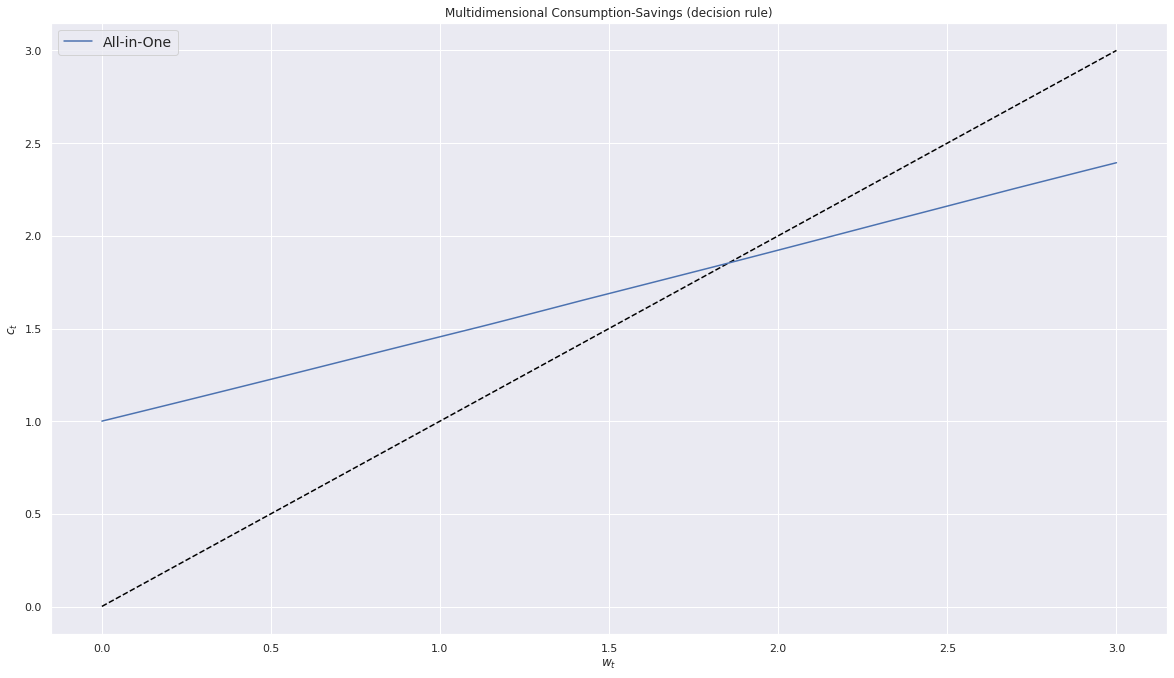

In [32]:
# Plot initial guess
model_MC.eval()

# Define the grid
nb_points = 100
with torch.no_grad():
    wvec_eval = torch.linspace(params.wmin, params.wmax, nb_points)
    rvec_eval = 0*torch.ones(nb_points) #torch.linspace(grid.σ_e_r_min, grid.σ_e_r_max, nb_points) #torch.zeros(nb_points)
    δvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)
    ps_vec_eval = 0*torch.ones(nb_points, params.dim_p) #torch.zeros(nb_points)

    # To store vaules
    ζvec = torch.zeros(nb_points)
    hvec = torch.zeros(nb_points)
    cvec = torch.zeros(nb_points)

    # state
    # order: w, r, delta, p1, ..., pl
    cvec, hvec = model_normalized(model_MC, wvec_eval, rvec_eval, δvec_eval, ps_vec_eval, params)

plt.title("Multidimensional Consumption-Savings (decision rule)")
plt.plot(wvec_eval, wvec_eval, linestyle='--', color='black')
plt.plot(wvec_eval.detach().numpy(), cvec.detach().numpy(), label="All-in-One")
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.legend()

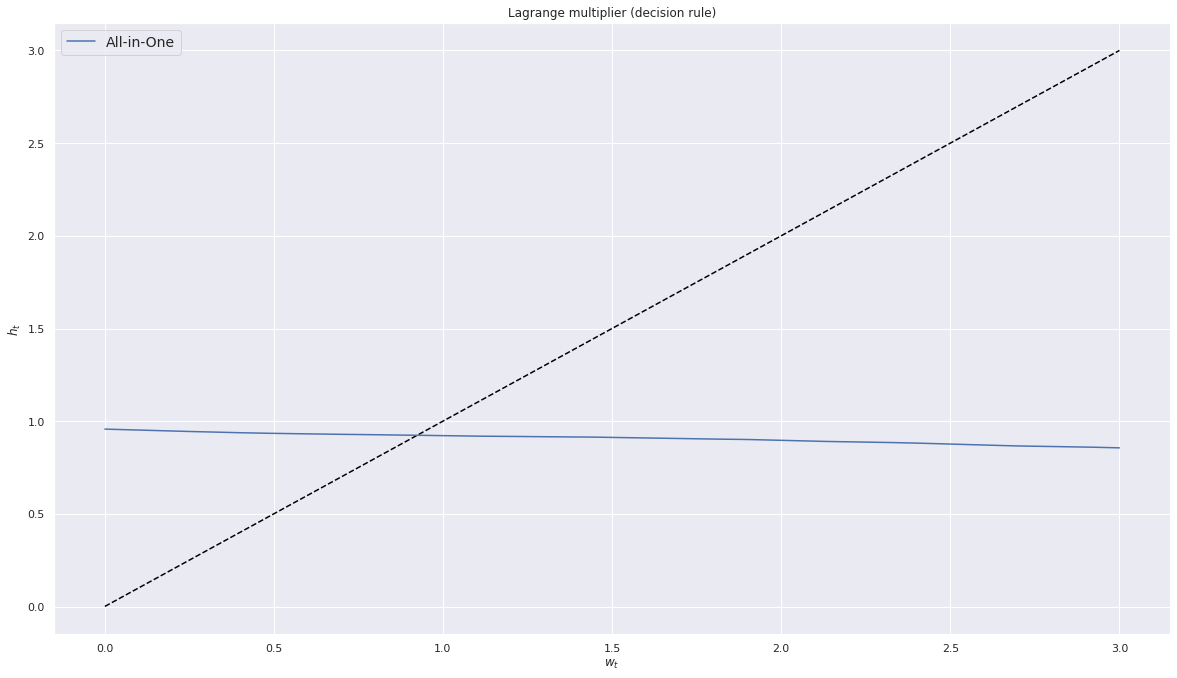

In [33]:
plt.title("Lagrange multiplier (decision rule)")
plt.plot(wvec_eval, wvec_eval, linestyle='--', color='black')
plt.plot(wvec_eval.detach().numpy(), hvec.detach().numpy(), label="All-in-One")
plt.xlabel("$w_t$")
plt.ylabel("$h_t$")
plt.legend()

In [34]:
with torch.no_grad():
    v = Ξ_torch_MC(model_MC, params)
print(v)

tensor(0.1540)


In [35]:
seed=123
np.random.seed(seed)
torch.manual_seed(seed)

model_MC.train()

if params.optimizer == "Adam":
    optimizer = torch.optim.Adam(model_MC.parameters(), lr=params.lr, eps=1e-07, betas=(0.9, 0.999)) 
elif params.optimizer == "SGD":
    optimizer = torch.optim.SGD(model_MC.parameters(), params.lr)
elif params.optimizer == "SWA":
    base_opt = torch.optim.Adam(model_MC.parameters(), lr=params.lr, eps=1e-07, betas=(0.9, 0.999)) 
    optimizer = SWA(base_opt, swa_start=params.swa_start, swa_freq=params.swa_freq, swa_lr=params.lr)
else:
    raise("optimizer unknown")

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params.freq_gamma)

loss_epochs_MC = torch.zeros(params.nb_epochs)
list_MC_gradient = [] #store the norm of the gradient
list_perc_abs_error_MC = [] #store median abs value percentage error
list_perc_abs_error_MC_mean = [] #mean
list_perc_abs_error_MC_max = [] #max
list_perc_abs_error_MC_std = [] #std
list_perc_abs_error_MC_i = [] #store index i
list_perc_abs_error_MC_loss = [] #store loss
min_euler_bis = float('inf')
best_model = copy.deepcopy(model_MC)
first_model = copy.deepcopy(model_MC)

for i in tqdm(range(0, params.nb_epochs)):
    loss = Ξ_torch_MC(model_MC, params)
    loss_epochs_MC[[i]] = float(loss.item())

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0: #Monitor the gradient
        model_MC.eval()
        # Evaluate accuracy 
        with torch.no_grad():
            euler, euler_bis, c, c_RHS, w = evaluate_accuracy_pytorch_MC_frozen(model_MC, params)
        list_perc_abs_error_MC.append(np.median(euler_bis))
        list_perc_abs_error_MC_mean.append(np.mean(euler_bis))
        list_perc_abs_error_MC_max.append(np.max(euler_bis))
        list_perc_abs_error_MC_std.append(np.std(euler_bis))
        list_perc_abs_error_MC_i.append(i)
        list_perc_abs_error_MC_loss.append(float(loss.item()))
        model_MC.train()
        # Check if current model is better
        mean_euler_bis = np.mean(euler_bis)
        if mean_euler_bis < min_euler_bis:
            min_euler_bis = mean_euler_bis
            best_model = copy.deepcopy(model_MC)
    if i % 1000 == 0:
        loss, current = float(loss.item()), i
        print(f"loss: {loss:>7f}, median euler error {list_perc_abs_error_MC[-1]:>7f}, [{current:>5d}/{params.nb_epochs:>5d}]")
    if (i % params.freq_scheduler == 0) & (i != 0) & (params.use_scheduler == True):
        scheduler.step()
        print("i : {}. Decreasing learning rate: {}".format(i, scheduler.get_last_lr()))

if params.optimizer == "SWA":
    optimizer.swap_swa_sgd()


  0%|▎                                                                                     | 31/10000 [00:00<00:56, 176.91it/s]

loss: 0.158750, median euler error 0.161832, [    0/10000]


 11%|████████▉                                                                           | 1060/10000 [00:04<00:33, 265.34it/s]

loss: 0.000073, median euler error 0.003649, [ 1000/10000]


 20%|█████████████████▏                                                                  | 2049/10000 [00:07<00:26, 304.88it/s]

loss: -0.000156, median euler error 0.002742, [ 2000/10000]


 30%|█████████████████████████▌                                                          | 3038/10000 [00:11<00:24, 285.41it/s]

loss: 0.000042, median euler error 0.002382, [ 3000/10000]


 41%|██████████████████████████████████                                                  | 4060/10000 [00:15<00:21, 272.47it/s]

loss: 0.000015, median euler error 0.002111, [ 4000/10000]


 50%|██████████████████████████████████████████▎                                         | 5041/10000 [00:18<00:18, 263.32it/s]

loss: -0.000017, median euler error 0.002199, [ 5000/10000]


 60%|██████████████████████████████████████████████████▋                                 | 6030/10000 [00:22<00:14, 266.11it/s]

loss: -0.000015, median euler error 0.002190, [ 6000/10000]


 70%|███████████████████████████████████████████████████████████                         | 7037/10000 [00:26<00:10, 286.27it/s]

loss: 0.000058, median euler error 0.002007, [ 7000/10000]


 81%|███████████████████████████████████████████████████████████████████▋                | 8065/10000 [00:29<00:06, 296.88it/s]

loss: -0.000022, median euler error 0.002138, [ 8000/10000]


 91%|████████████████████████████████████████████████████████████████████████████        | 9061/10000 [00:33<00:03, 300.09it/s]

loss: 0.000091, median euler error 0.002034, [ 9000/10000]


100%|███████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:36<00:00, 275.57it/s]


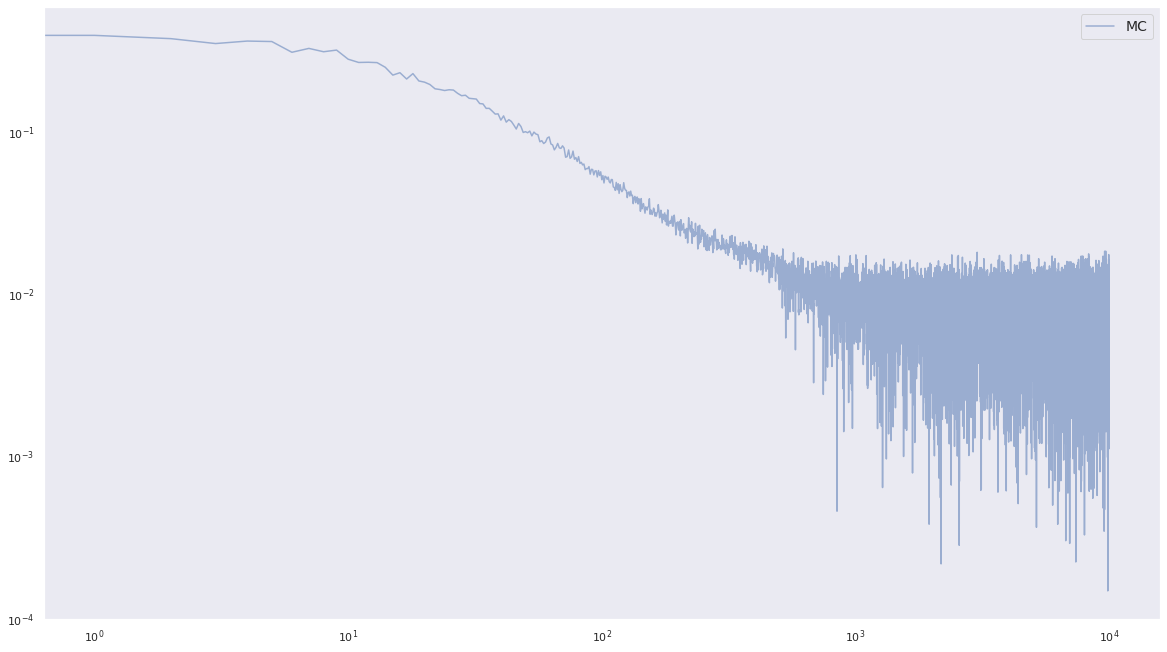

In [36]:
plt.plot(np.sqrt(np.abs(loss_epochs_MC)), label="MC", alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()

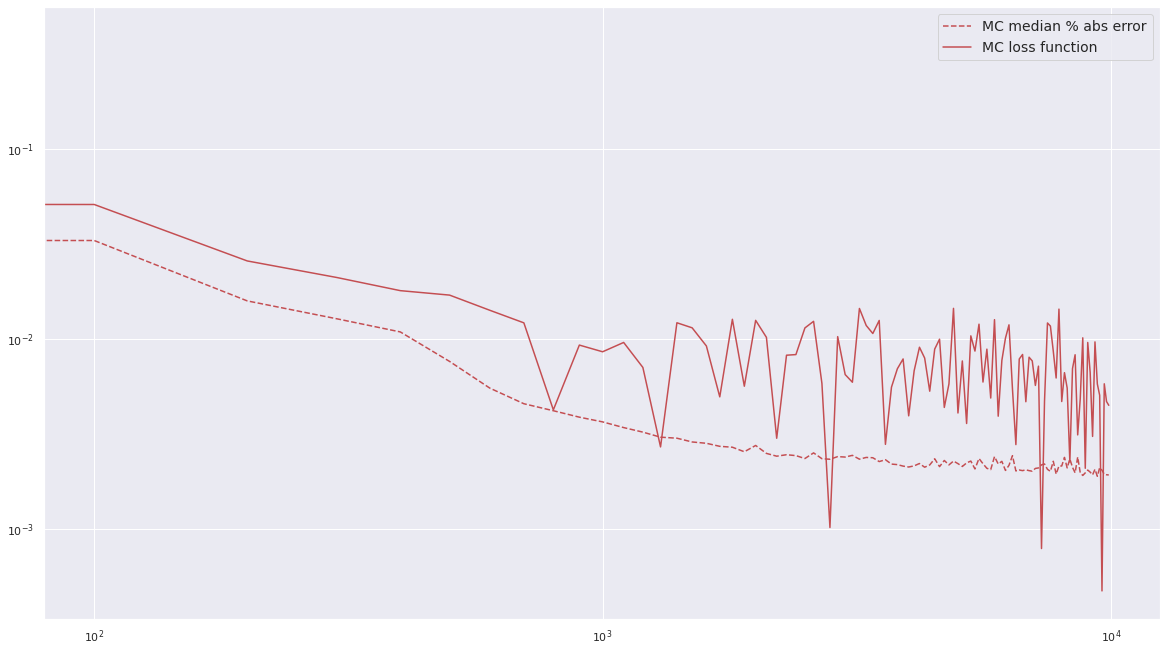

In [37]:
plt.plot(list_perc_abs_error_MC_i, list_perc_abs_error_MC, label="MC median % abs error", linestyle="--", color='r')
plt.plot(list_perc_abs_error_MC_i, np.sqrt( np.abs(list_perc_abs_error_MC_loss)), label="MC loss function", color='r')
plt.xscale('log')
plt.yscale('log')
plt.legend()

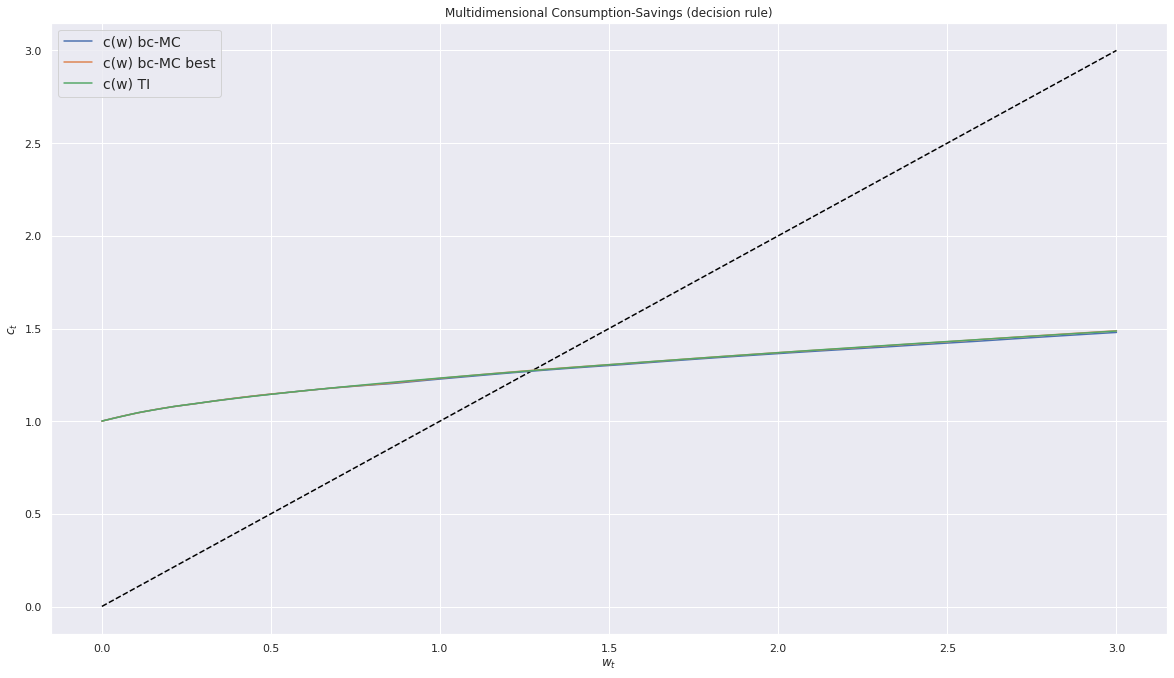

In [38]:
# Test approximation
model_MC.eval()

# Define the grid
nb_points = 100
with torch.no_grad():
    wvec_eval = torch.linspace(params.wmin, params.wmax, nb_points)
    rvec_eval = 0*torch.ones(nb_points) #torch.linspace(grid.σ_e_r_min, grid.σ_e_r_max, nb_points) #torch.zeros(nb_points)
    ps_vec_eval = 0*torch.ones(nb_points, params.dim_p) #torch.zeros(nb_points)
    δvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)

    # To store vaules
    ζvec = torch.zeros(nb_points)
    hvec = torch.zeros(nb_points)
    cvec = torch.zeros(nb_points)

    # state
    # order: w, r, delta, p1, ..., pl
    # last model
    cvec_MC, hvec_MC = model_normalized(model_MC, wvec_eval, rvec_eval, δvec_eval, ps_vec_eval, params)
    # best model
    cvec_MC_best, hvec_MC_best = model_normalized(best_model, wvec_eval, rvec_eval, δvec_eval, ps_vec_eval, params)
    
    # Save for latter use
    cvec_MC_bc_0, hvec_MC_bc_0 = cvec_MC.detach().numpy(), hvec_MC.detach().numpy()
    cvec_MC_best_bc_0, hvec_MC_best_bc_0 = cvec_MC_best.detach().numpy(), hvec_MC_best.detach().numpy()

plt.title("Multidimensional Consumption-Savings (decision rule)")
plt.plot(wvec_eval, wvec_eval, linestyle='--', color='black')
plt.plot(wvec_eval.detach().numpy(), cvec_MC.detach().numpy(), label="c(w) bc-MC")
plt.plot(wvec_eval.detach().numpy(), cvec_MC_best.detach().numpy(), label="c(w) bc-MC best")
plt.plot(params_TI.xvec_test, cvec_TI_denser_bc_0, label='c(w) TI')
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.legend()

### Accuracy

Euler MC
Mean: 0.0039802249521017075
Median: 0.0027820467948913574
Min: 3.337860107421875e-06
Max: 0.0625685453414917
std dev.: 0.0051526837050914764
Euler Bis MC
Mean: 0.002000509761273861
Median: 0.0013919472694396973
Min: 1.6689300537109375e-06
Max: 0.03283333778381348
std dev.: 0.0026324111968278885


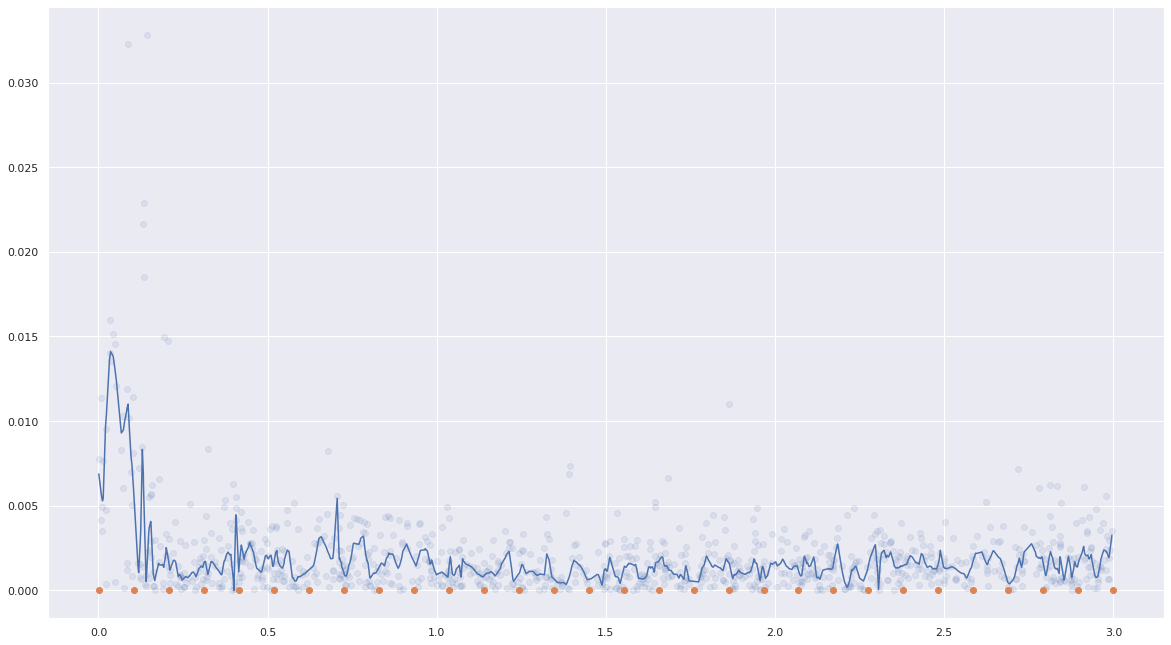

In [39]:
model_MC.eval()

# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_pytorch_MC(model_MC, 1000, 1000, params)

print("Euler MC")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("Euler Bis MC")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))

# Smoothed conditional mean
smoothed = lowess(euler_bis, w, frac=1./100)
plt.scatter(w, euler_bis, alpha=0.1)
plt.scatter(params_TI.w_grid, np.zeros(len(params_TI.w_grid)), label="grid points")
plt.plot(smoothed[:,0], smoothed[:,1])

Euler MC
Mean: 0.003934661392122507
Median: 0.00293654203414917
Min: 7.748603820800781e-07
Max: 0.06989079713821411
std dev.: 0.004895525518804789
Euler Bis MC
Mean: 0.0019787580240517855
Median: 0.0014680027961730957
Min: 4.76837158203125e-07
Max: 0.03689086437225342
std dev.: 0.0025092712603509426


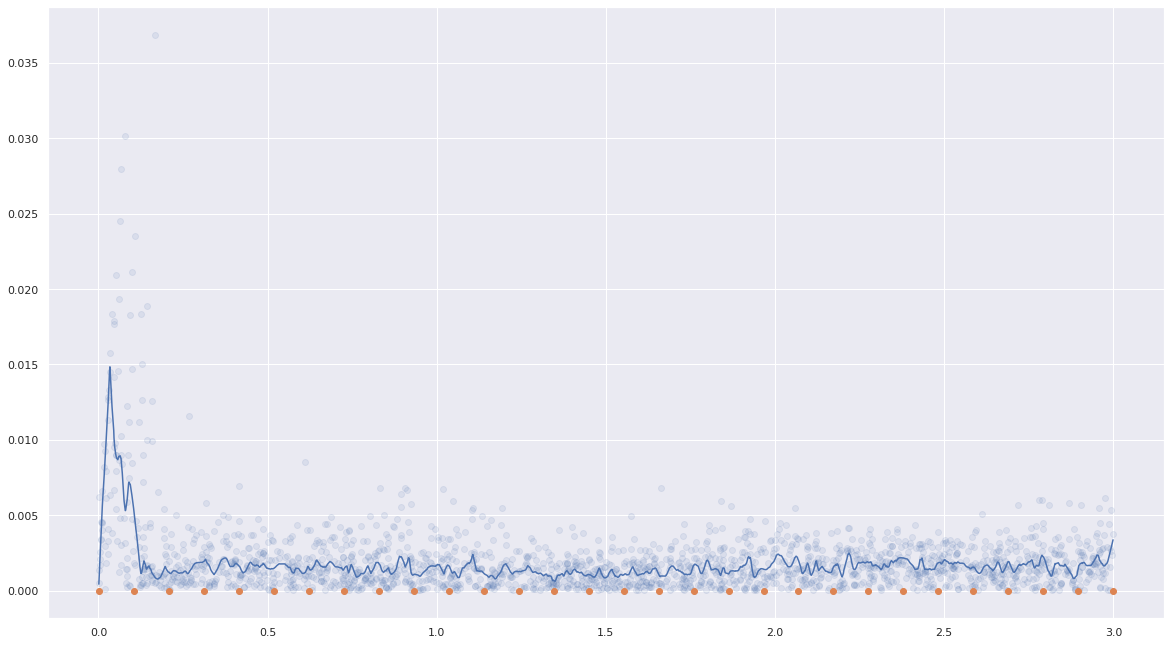

In [40]:
model_MC.eval()

# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_pytorch_Gaussian(model_MC, 2000, params)

print("Euler MC")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("Euler Bis MC")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))

# Smoothed conditional mean
smoothed = lowess(euler_bis, w, frac=1./100)
plt.scatter(w, euler_bis, alpha=0.1)
plt.scatter(params_TI.w_grid, np.zeros(len(params_TI.w_grid)), label="grid points")
plt.plot(smoothed[:,0], smoothed[:,1])

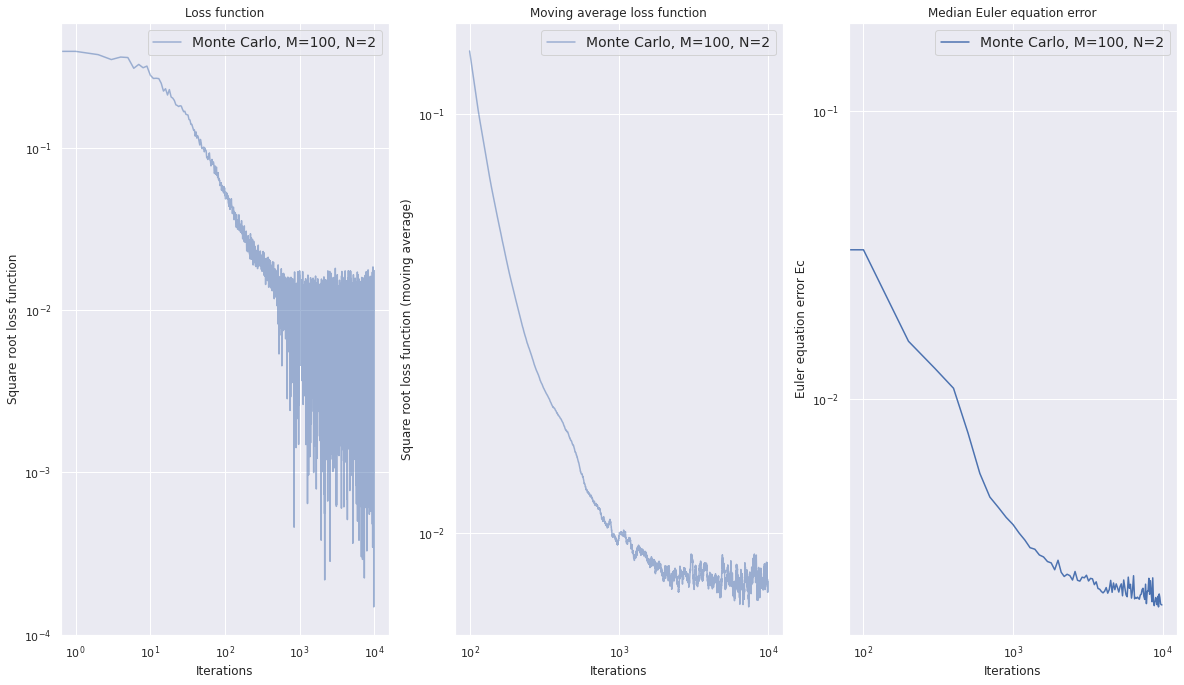

In [41]:
plot_scale = 1.25
rate=1
last_N_values = 2
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

rate = 1
#fig.suptitle('Horizontally stacked subplots')
ax1.plot(pd.Series(np.sqrt( np.abs(loss_epochs_MC))).rolling(rate).mean(), label="Monte Carlo, M={}, N={}".format(params.M, params.N), alpha=0.5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Square root loss function')
ax1.set_xlabel('Iterations')
ax1.set_title('Loss function')
ax1.legend()


rate = 100
#fig.suptitle('Horizontally stacked subplots')
ax2.plot(pd.Series(np.sqrt( np.abs(loss_epochs_MC))).rolling(rate).mean(), label="Monte Carlo, M={}, N={}".format(params.M, params.N), alpha=0.5)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel('Square root loss function (moving average)')
ax2.set_xlabel('Iterations')
ax2.set_title('Moving average loss function')
ax2.legend()

ax3.plot(list_perc_abs_error_MC_i, list_perc_abs_error_MC, label="Monte Carlo, M={}, N={}".format(params.M, params.N))
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel('Euler equation error Ec')
ax3.set_xlabel('Iterations')
ax3.set_title('Median Euler equation error')
ax3.legend()

#plt.suptitle("Loss function and absol".format(params.σ_e), fontsize=14)
figname = output_folder + 'summmary_MC_bc.png'
plt.savefig(figname)
plt.show()

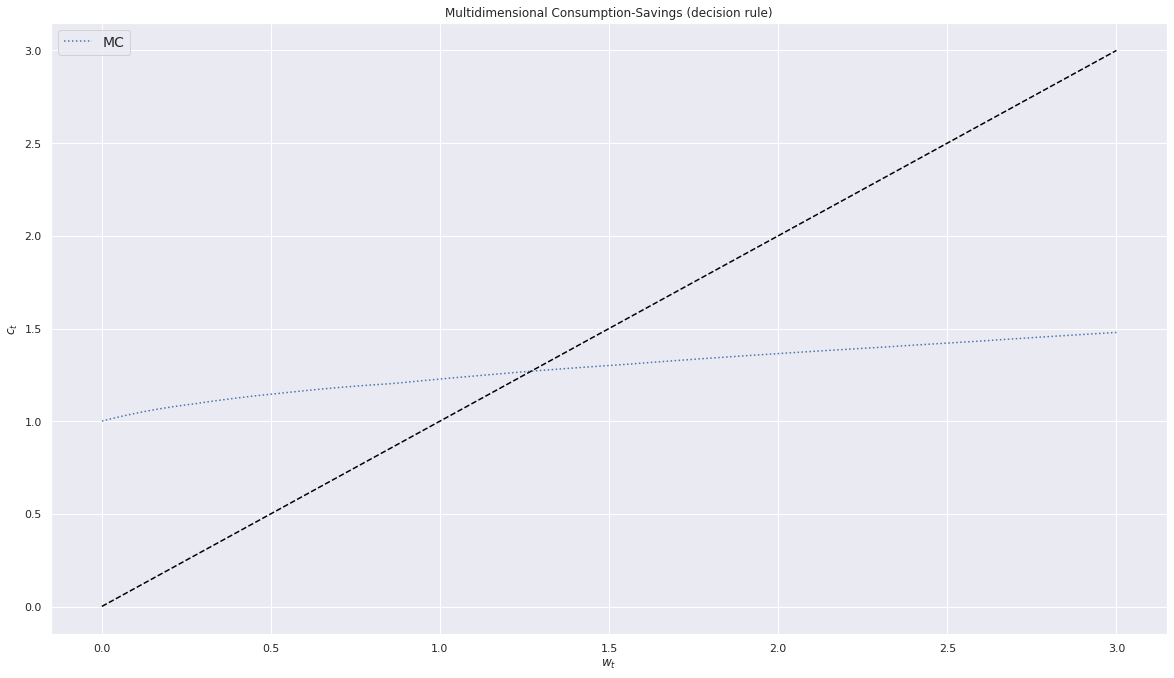

In [42]:
# Test approximation
model_MC.eval()

# Define the grid
nb_points = 100
with torch.no_grad():
    wvec_eval = torch.linspace(params.wmin, params.wmax, nb_points)
    #wvec_eval = torch.linspace(0.8, 1.2, nb_points)
    rvec_eval = 0*torch.ones(nb_points) #torch.linspace(grid.σ_e_r_min, grid.σ_e_r_max, nb_points) #torch.zeros(nb_points)
    δvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)

    ps_vec_eval = 0*torch.ones(nb_points, params.dim_p) #torch.zeros(nb_points)

    # To store vaules
    ζvec = torch.zeros(nb_points)
    hvec = torch.zeros(nb_points)
    cvec = torch.zeros(nb_points)

    # state
    # order: w, r, delta, p1, ..., pl
    cvec_MC, hvec_MC = model_normalized(model_MC, wvec_eval, rvec_eval, δvec_eval, ps_vec_eval, params)
    
plt.title("Multidimensional Consumption-Savings (decision rule)")
plt.plot(wvec_eval, wvec_eval, linestyle='--', color='black')
plt.plot(wvec_eval.detach().numpy(), cvec_MC.detach().numpy(), label="MC", linestyle='dotted')
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.legend()

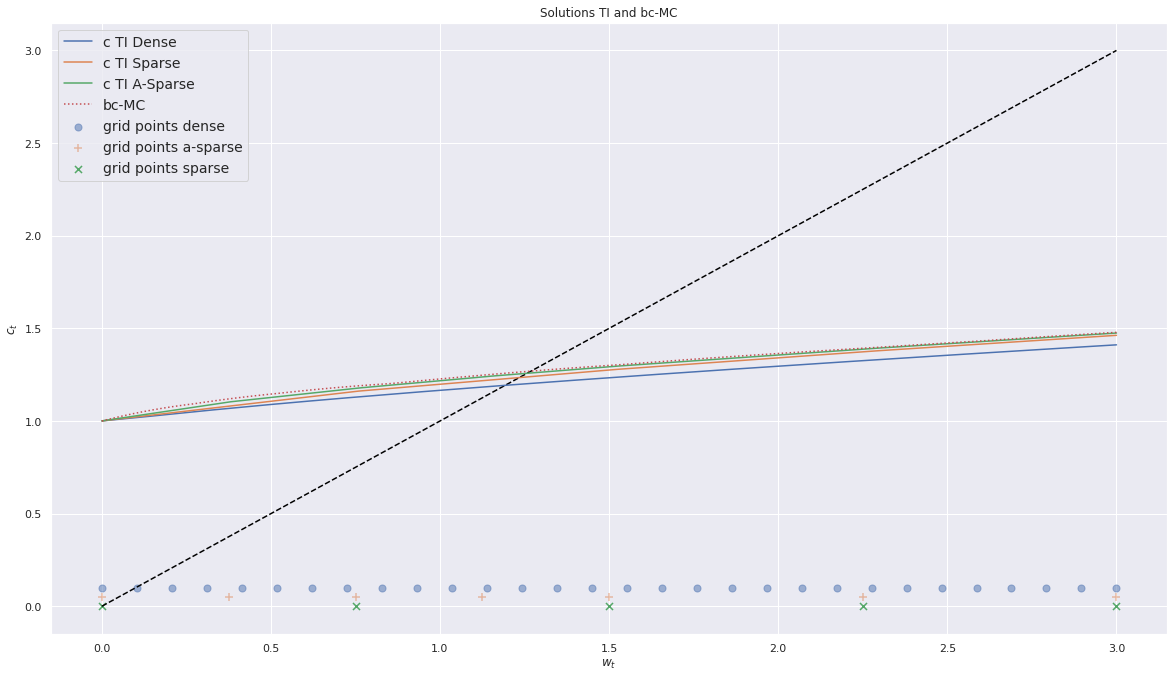

In [43]:
# Plot the result
len_wec = params_asparse.nb_points_test

with torch.no_grad():
    rvec = np.ones(len_wec)
    δvec = np.ones(len_wec)
    wvec = params_asparse.xvec_test

    wrδ_next = np.column_stack((wvec, rvec, δvec)) #w, r, delta
    state_next = np.hstack((wrδ_next, np.zeros((len_wec, dim_p_chosen)))) 
    cvec_TI = params_TI.c_function_TI(state_next) 
    cvec_TI_sparse = params_sparse.c_function_TI_sparse(state_next) 
    cvec_TI_asparse = params_asparse.c_function_TI_sparse(state_next) 
    k_next_TI_asparse = wvec.squeeze(1) - cvec_TI_asparse

plt.plot(wvec, wvec, linestyle='--', color='black')
plt.plot(wvec, cvec_TI, label='c TI Dense')
plt.plot(wvec, cvec_TI_sparse, label='c TI Sparse')
plt.plot(wvec, cvec_TI_asparse, label='c TI A-Sparse')
plt.plot(wvec_eval.detach().numpy(), cvec_MC.detach().numpy(), label="bc-MC", linestyle='dotted')

w_grid_asparse = np.unique(params_asparse.grid_old.getPoints()[:,0])
w_grid_sparse = np.unique(params_sparse.grid_old.getPoints()[:,0])
plt.scatter(params_TI.w_grid, 0.1*np.ones(len(params_TI.w_grid)), label="grid points dense", alpha=0.5, s=50)
plt.scatter(w_grid_asparse, 0.05*np.ones(len(w_grid_asparse)), label="grid points a-sparse", alpha=0.5, s=50, marker="+")
plt.scatter(w_grid_sparse, np.zeros(len(w_grid_sparse)), label="grid points sparse", alpha=1.0, s=50, marker="x")

plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.title("Solutions TI and bc-MC")
plt.legend()
plt.show()


### Plot bc-MC and dense grid

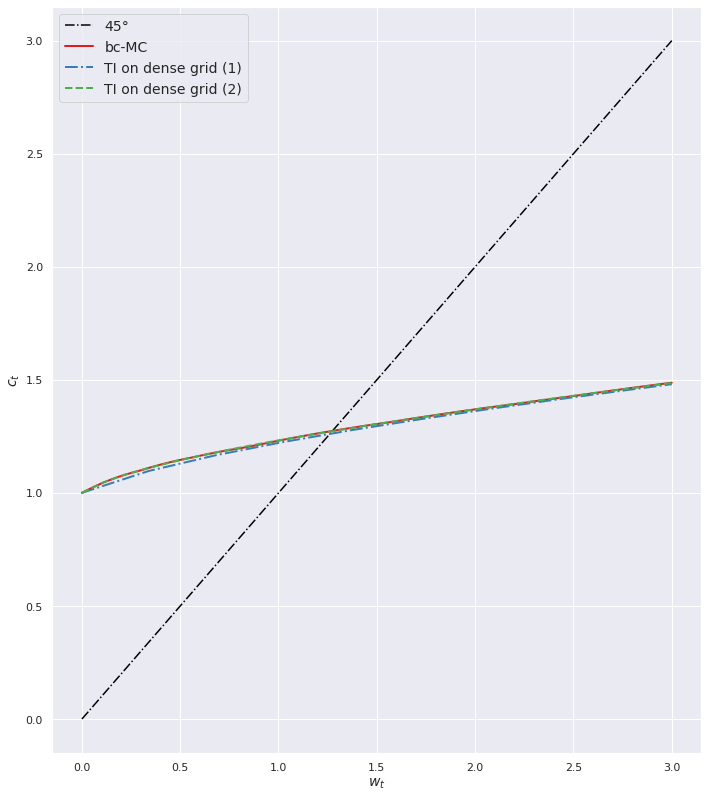

In [44]:
colors = sns.color_palette("Set1", 3)

fig, (ax1) = plt.subplots(1, figsize = (0.5*plot_scale*16, plot_scale*9))

color_bc_1 = "green"
color_bc_0 = "blue"
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE

ax1.plot(wvec_eval, wvec_eval, linestyle='-.', color='black', label="45°")
ax1.plot(wvec_eval.detach().numpy(), cvec_MC_best, label="bc-MC", color=colors[0], linewidth=linewidth_chosen)
ax1.plot(params_TI.xvec_test, cvec_TI_bc_0, label="TI on dense grid (1)", color=colors[1], linestyle="-.", linewidth=linewidth_chosen)
ax1.plot(params_TI.xvec_test, cvec_TI_denser_bc_0, label="TI on dense grid (2)", color=colors[2], linestyle="--", linewidth=linewidth_chosen)
ax1.set_xlabel("$w_t$",size=MEDIUM_SIZE)
ax1.set_ylabel("$c_t$",size=MEDIUM_SIZE)
#ax1.set_title('bc-MC Operator and TI (b=0)',size=MEDIUM_SIZE)
#ax1.scatter(wgrid_TI_dense_bc_0, 0.0*np.ones(len(wgrid_TI_dense_bc_0)), label="grid points dense (1)", alpha=1.0, s=80, color = colors[1], marker="+")
#ax1.scatter(wgrid_TI_denser_bc_0, 0.0*np.ones(len(wgrid_TI_denser_bc_0)), label="grid points dense (2)", alpha=1.0, s=80, color = colors[2], marker="x")
ax1.legend()

fig.tight_layout()
figname = output_folder + f"model_MC_&_TI_bc_{params_TI.bc}.pdf"
plt.savefig(figname, dpi = dpi_chosen)
plt.show()